# Milestone 4 Notebook

Members: Siri Pranivong, Chloe Seo, Kaylee Vo, Kai Yeh

## Table of Contents

1. **[Data Overview](#data-overview)**
    - 1.1 [Data Description](#data-description)
    - 1.2 [Data Summary](#data-summary)
        - 1.2.1 [Discrete Variables](#discrete-variables)
        - 1.2.2 [Continuous Variables](#continuous-variables)
        - 1.2.3 [Binary Variables](#binary-variables)
2. **[Exploratory Data Analysis](#exploratory-data-analysis)**
    - 3.1 [Deeper Understanding of the Data](#deeper-understanding-of-the-data)
    - 3.2 [Meaningful Insights](#meaningful-insights)
    - 3.3 [Noteworthy Findings](#noteworthy-findings)
3. **[Research Question](#research-question)**
4. **[Baseline Models](#baseline-models)**
5. **[Prediction Models](#prediction-models)**
6. **[Model Evaluation](#model-evaluation)**
7. **[Causal Inference](#causal-inference)**

### Imports

In [40]:
import re
import string

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    RandomizedSearchCV,
    StratifiedKFold,
    cross_val_predict,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from utils.helper import get_variable_category, split_snake_case

### Pandas Settings

In [41]:
pd.set_option("display.max_columns", None)

### Notebook Parameters

In [42]:
output_img = False
random_state = 109

## Data Overview

### Data Description

In [4]:
X_train = pd.read_csv("./data/prod/X_train.csv")
y_train = pd.read_csv("./data/prod/y_train.csv")
X_test = pd.read_csv("./data/prod/X_test.csv")
y_test = pd.read_csv("./data/prod/y_test.csv")
data_dictionary = pd.read_csv("./data/raw/data_dictionary.csv")

In [5]:
# Preview the Data
X_train.head()

customer_id  perc_change_minutes  perc_change_revenues  dropped_calls  \
0      3153578                 98.0                   0.2            2.3   
1      3163414                -38.0                  -0.4            3.0   
2      3348322                 13.0                  -0.9            6.3   
3      3269774                  0.0                   0.0            0.0   
4      3283286               -122.0                  -5.5            0.0   

   unanswered_calls  received_calls  months_in_service  unique_subs  \
0               9.7            50.3                 16            1   
1              10.3            95.1                 16            1   
2              10.0             7.2                 10            1   
3               0.0             0.0                 13            1   
4               0.0             0.0                  8            1   

   active_subs  handsets  handset_models  current_equipment_days  age_hh1  \
0            1       1.0             1.0                   501.0     26.0   
1            1       1.0             1.0                   478.0     46.0   
2            1       1.0             1.0                   291.0     58.0   
3            1       1.0             1.0                   384.0      0.0   
4            1       1.0             1.0                   253.0     50.0   

   age_hh2  children_in_hh  handset_refurbished  handset_web_capable  \
0      0.0               0                    0                    1   
1      0.0               0                    0                    1   
2     58.0               0                    0                    1   
3      0.0               0                    0                    1   
4     48.0               1                    0                    1   

   truck_owner  rv_owner  homeownership  buys_via_mail_order  \
0            0         0              1                    0   
1            0         0              1                    1   
2            0         0              1                    1   
3            0         0              0                    0   
4            0         0              1                    1   

   responds_to_mail_offers  opt_out_mailings  non_us_travel  owns_computer  \
0                        0                 0              0              0   
1                        1                 0              0              0   
2                        1                 0              0              1   
3                        0                 0              0              0   
4                        1                 0              1              0   

   has_credit_card  retention_calls  retention_offers_accepted  \
0                0                0                          0   
1                1                0                          0   
2                1                0                          0   
3                0                0                          0   
4                1                0                          0   

   new_cellphone_user  referrals_made_by_subscriber  income_group  \
0                   1                             0             4   
1                   0                             0             8   
2                   0                             0             7   
3                   0                             0             0   
4                   0                             0             1   

   owns_motorcycle  adjustments_to_credit_rating  handset_price  \
0                0                             0       71.06962   
1                0                             0       71.06962   
2                0                             0       71.06962   
3                0                             0       71.06962   
4                0                             0       71.06962   

   made_call_to_retention_team  credit_rating  total_care_issues  \
0                            0              2                2.6   
1                 

In [6]:
# Data size
print("Train Data Dimensions:", X_train.shape)
print(f"Test Data Dimensions:", X_test.shape)
print(
    f"Train Split Size: {round(X_train.shape[0]/(X_train.shape[0] + X_test.shape[0]), 4)}"
)

Train Data Dimensions: (20520, 69)
Test Data Dimensions: (5131, 69)
Train Split Size: 0.8


In [7]:
# Descriptive Statistics
X_train.describe().round(2)

customer_id  perc_change_minutes  perc_change_revenues  dropped_calls  \
count     20520.00             20520.00              20520.00       20520.00   
mean    3192916.70                -7.14                 -0.89           2.42   
std      115677.81                83.30                  3.73           2.87   
min     3000010.00              -329.00                -12.80           0.00   
25%     3091764.00               -45.00                 -1.70           0.30   
50%     3186958.00                -4.00                 -0.20           1.30   
75%     3294300.00                29.00                  0.00           3.70   
max     3399946.00               307.00                 10.20          15.00   

       unanswered_calls  received_calls  months_in_service  unique_subs  \
count          20520.00        20520.00           20520.00     20520.00   
mean              12.23           36.80              19.26         1.57   
std               13.14           48.49               9.58         1.62   
min                0.00            0.00               6.00         1.00   
25%                2.30            1.20              11.00         1.00   
50%                8.00           16.80              17.00         1.00   
75%               17.70           53.92              25.00         2.00   
max               71.70          248.40              60.00       196.00   

       active_subs  handsets  handset_models  current_equipment_days  \
count     20520.00  20520.00        20520.00                20520.00   
mean          1.40      1.50            1.36                  444.75   
std           0.75      0.84            0.64                  260.54   
min           0.00      1.00            1.00                   -4.00   
25%           1.00      1.00            1.00                  260.00   
50%           1.00      1.00            1.00                  386.00   
75%           2.00      2.00            2.00                  604.00   
max          53.00      5.00            5.00                 1554.00   

        age_hh1   age_hh2  children_in_hh  handset_refurbished  \
count  20520.00  20520.00        20520.00             20520.00   
mean      35.86     26.38            0.27                 0.11   
std       23.23     28.70            0.44                 0.32   
min        0.00      0.00            0.00                 0.00   
25%       26.00      0.00            0.00                 0.00   
50%       40.00     28.00            0.00                 0.00   
75%       50.00     46.00            1.00                 0.00   
max      108.03    149.81            1.00                 1.00   

       handset_web_capable  truck_owner  rv_owner  homeownership  \
count             20520.00     20520.00  20520.00       20520.00   
mean                  0.87         0.21      0.09           0.73   
std                   0.34         0.41      0.29           0.45   
min                   0.00         0.00      0.00           0.00   
25%                   1.00         0.00      0.00           0.00   
50%                   1.00         0.00      0.00           1.00   
75%                   1.00         0.00      0.00           1.00   
max                   1.00         1.00      1.00           1.00   

       buys_via_mail_order  responds_to_mail_offers  opt_out_mailings  \
count             20520.00                 20520.00          20520.00   
mean                  0.42                     0.44              0.02   
std                   0.49                     0.50              0.14   
min                   0.00                     0.00              0.00   
25%                   0.00                     0.00              0.00   
50%                   0.00                     0.00              0.00   
75%                   1.00                     1.00              0.00   
max                   1.00                     1.00              1.00   

       non_us_travel  owns_computer  has_credit_card  retention_calls  \
count       20520.00  

In [8]:
# Data Types and missingness
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20520 entries, 0 to 20519
Data columns (total 69 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           20520 non-null  int64  
 1   perc_change_minutes                   20520 non-null  float64
 2   perc_change_revenues                  20520 non-null  float64
 3   dropped_calls                         20520 non-null  float64
 4   unanswered_calls                      20520 non-null  float64
 5   received_calls                        20520 non-null  float64
 6   months_in_service                     20520 non-null  int64  
 7   unique_subs                           20520 non-null  int64  
 8   active_subs                           20520 non-null  int64  
 9   handsets                              20520 non-null  float64
 10  handset_models                        20520 non-null  float64
 11  current_equipme

In [9]:
# No. Of missing vablues per variable
X_train.isnull().sum()

customer_id                          0
perc_change_minutes                  0
perc_change_revenues                 0
dropped_calls                        0
unanswered_calls                     0
                                    ..
age_hh2_is_zero                      0
total_care_issues_is_zero            0
value_added_service_usage_is_zero    0
total_calls_is_zero                  0
total_peak_off_peak_calls_is_zero    0
Length: 69, dtype: int64

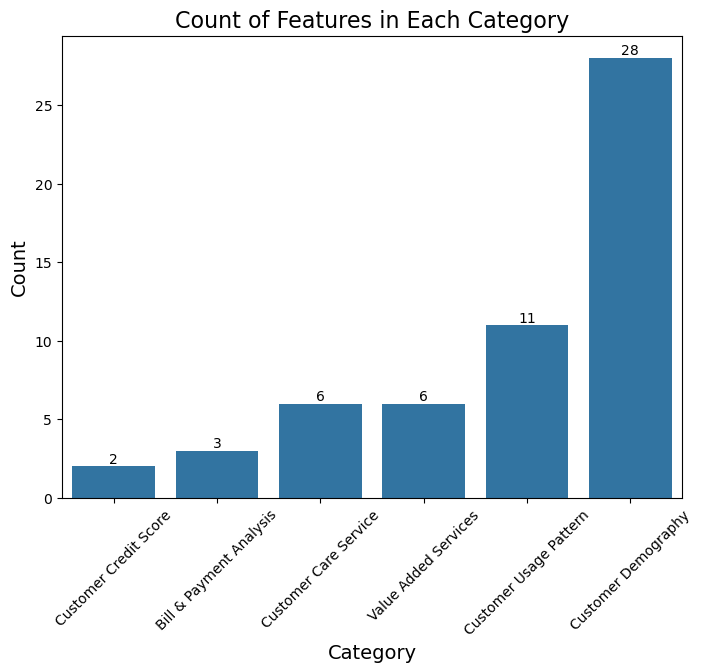

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

plot_data = data_dictionary[
    ~data_dictionary["Category"].isin(["Customer ID", "Response Variable"])
]
_ = sns.countplot(
    x="Category",
    data=plot_data,
    order=plot_data["Category"].value_counts(ascending=True).index,
)
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".0f"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
ax.set_title("Count of Features in Each Category", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Category", fontsize=14)
plt.xticks(rotation=45)

if output_img:
    plt.savefig("./img/m3_fig0.png", bbox_inches="tight")

### Data Summary

In [13]:
discrete_vars, categorical_vars, continuous_vars, binary_vars, id_vars = (
    get_variable_category(X_train)
)

In [14]:
print(f"Number of Discrete Variables: {len(discrete_vars)}")
print(f"Number of Categorical Variables: {len(categorical_vars)}")
print(f"Number of Continuous Variables: {len(continuous_vars)}")
print(f"Number of Binary Variables: {len(binary_vars)}")
print(f"Number of ID Variables: {len(id_vars)}")

Number of Discrete Variables: 8
Number of Categorical Variables: 0
Number of Continuous Variables: 18
Number of Binary Variables: 42
Number of ID Variables: 1


There are no categorical variables because they have all been one-hot encoded.

In [15]:
# Sanity Check
assert len(binary_vars) + len(categorical_vars) + len(discrete_vars) + len(
    id_vars
) + len(continuous_vars) == len(X_train.columns)

#### Discrete Variables

In [ ]:
discrete_vars[1:]

['handsets',
 'handset_models',
 'retention_calls',
 'retention_offers_accepted',
 'referrals_made_by_subscriber',
 'income_group',
 'credit_rating']

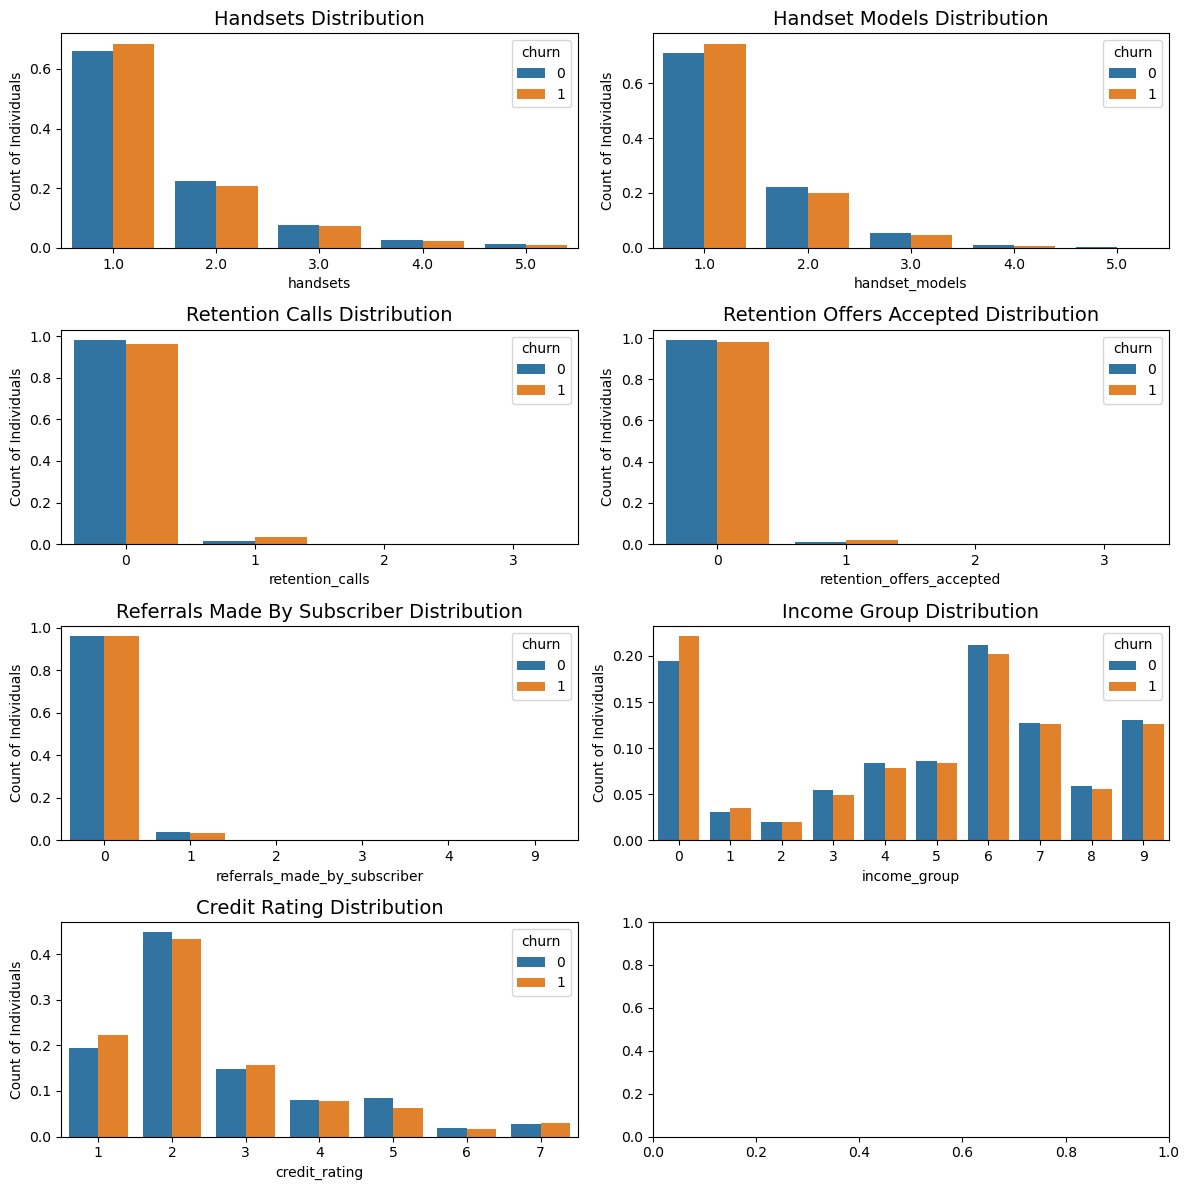

In [ ]:
train = pd.concat([X_train, y_train], axis=1)

fig, ax = plt.subplots(4, 2, figsize=(12, 12))

for ax, column in zip(ax.ravel(), discrete_vars[1:]):  # Drop ID
    counts = (
        train[[column, "churn"]]
        .groupby("churn")
        .value_counts(normalize=True)
        .reset_index()
    )
    counts = counts.sort_values(column)

    sns.barplot(x=column, y="proportion", data=counts, ax=ax, hue="churn")
    ax.set_title(f"{split_snake_case(column)} Distribution", fontsize=14)
    ax.set_ylabel("Count of Individuals")
    ax.set_xlabel(column)
    if counts[column].nunique() > 10:
        x_ticks = ax.get_xticks()
        ax.set_xticks(x_ticks[::2])

plt.tight_layout()

In [ ]:
if output_img:
    fig.savefig('./img/m3_fig1.png', format='png', dpi=300, bbox_inches='tight')

#### Continuous Variables

In [17]:
continuous_vars

['perc_change_minutes',
 'perc_change_revenues',
 'dropped_calls',
 'unanswered_calls',
 'received_calls',
 'months_in_service',
 'unique_subs',
 'current_equipment_days',
 'age_hh1',
 'age_hh2',
 'adjustments_to_credit_rating',
 'handset_price',
 'total_care_issues',
 'overall_revenue',
 'overall_usage',
 'value_added_service_usage',
 'total_calls',
 'total_peak_off_peak_calls']

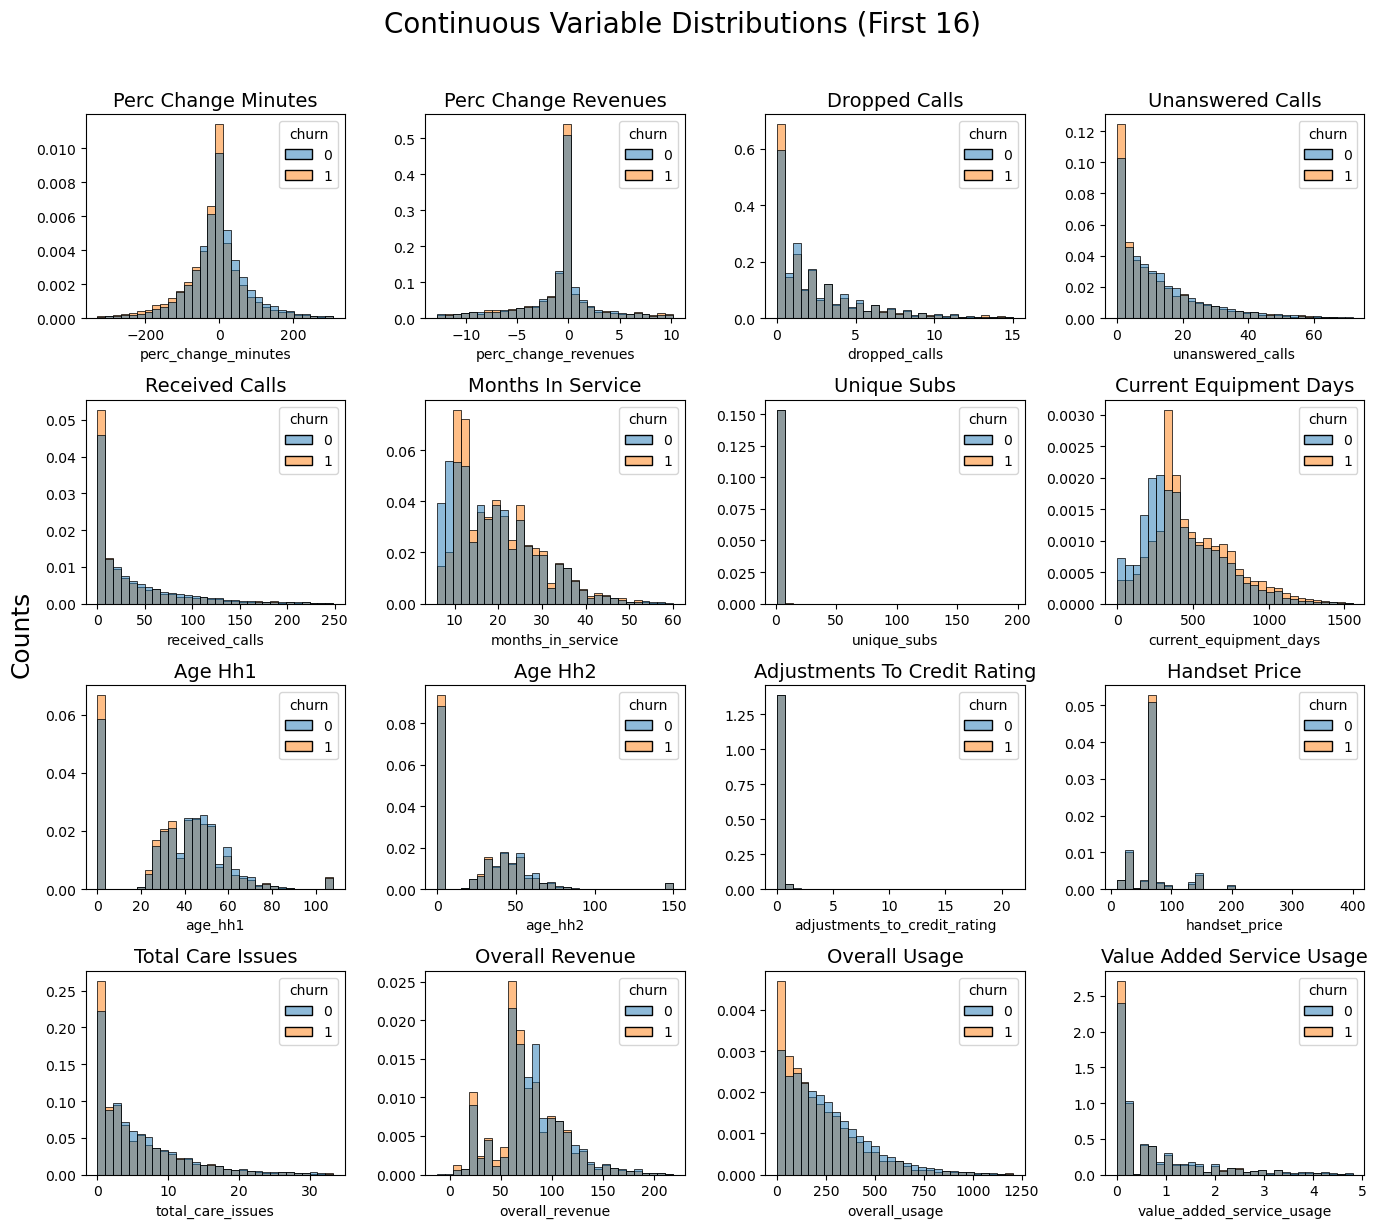

In [18]:
fig, ax = plt.subplots(4, 4, figsize=(14, 12))

for ax, column in zip(ax.ravel(), continuous_vars[:16]):
    sns.histplot(
        x=column,
        data=train[[column, "churn"]],
        bins=30,
        ax=ax,
        hue="churn",
        stat="density",
        common_norm=False,
    )
    ax.set_title(f"{split_snake_case(column)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(column)
fig.supylabel("Counts", fontsize=18)
fig.suptitle("Continuous Variable Distributions (First 16)", fontsize=20, y=1.02)
plt.tight_layout()

In [ ]:
if output_img:
    fig.savefig('./img/m3_fig3a.png', format='png', dpi=300, bbox_inches='tight')

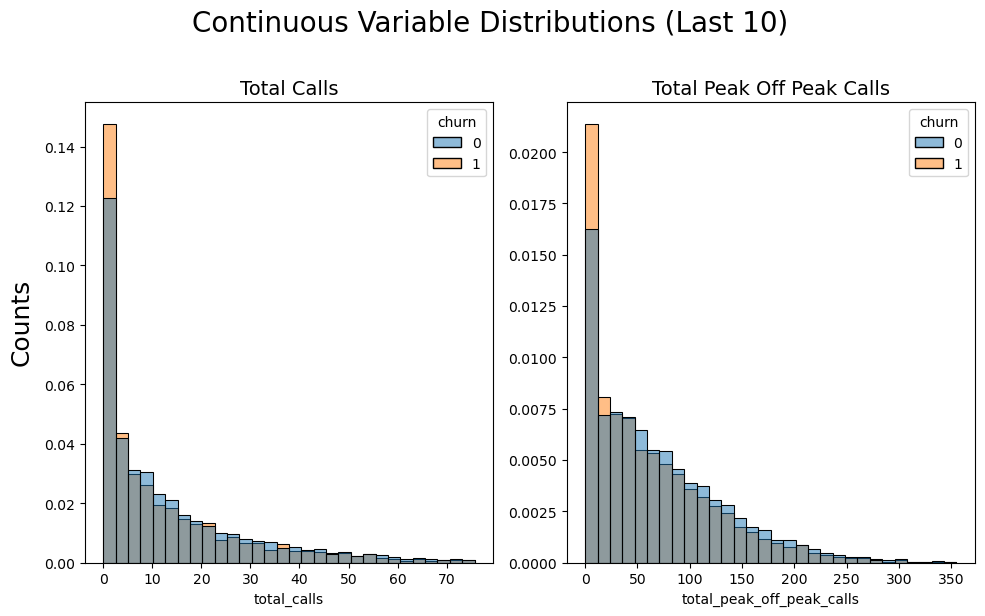

In [22]:
# Sorry for the redundant code
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

axes = ax.ravel()
for ax, column in zip(axes, continuous_vars[16:]):
    sns.histplot(
        x=column, 
        data=train[[column, "churn"]], 
        bins=30, 
        ax=ax, 
        hue="churn", 
        stat="density", 
        common_norm=False
    )
    ax.set_title(f'{split_snake_case(column)}', fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel(column)
fig.supylabel('Counts', fontsize=18)
fig.suptitle('Continuous Variable Distributions (Last 10)', fontsize=20, y=1.02)
# axes[-1].set_visible(False)
# axes[-2].set_visible(False)
plt.tight_layout()

In [ ]:
if output_img:
    fig.savefig('./img/m3_fig3b.png', format='png', dpi=300, bbox_inches='tight')

##### Box Plots

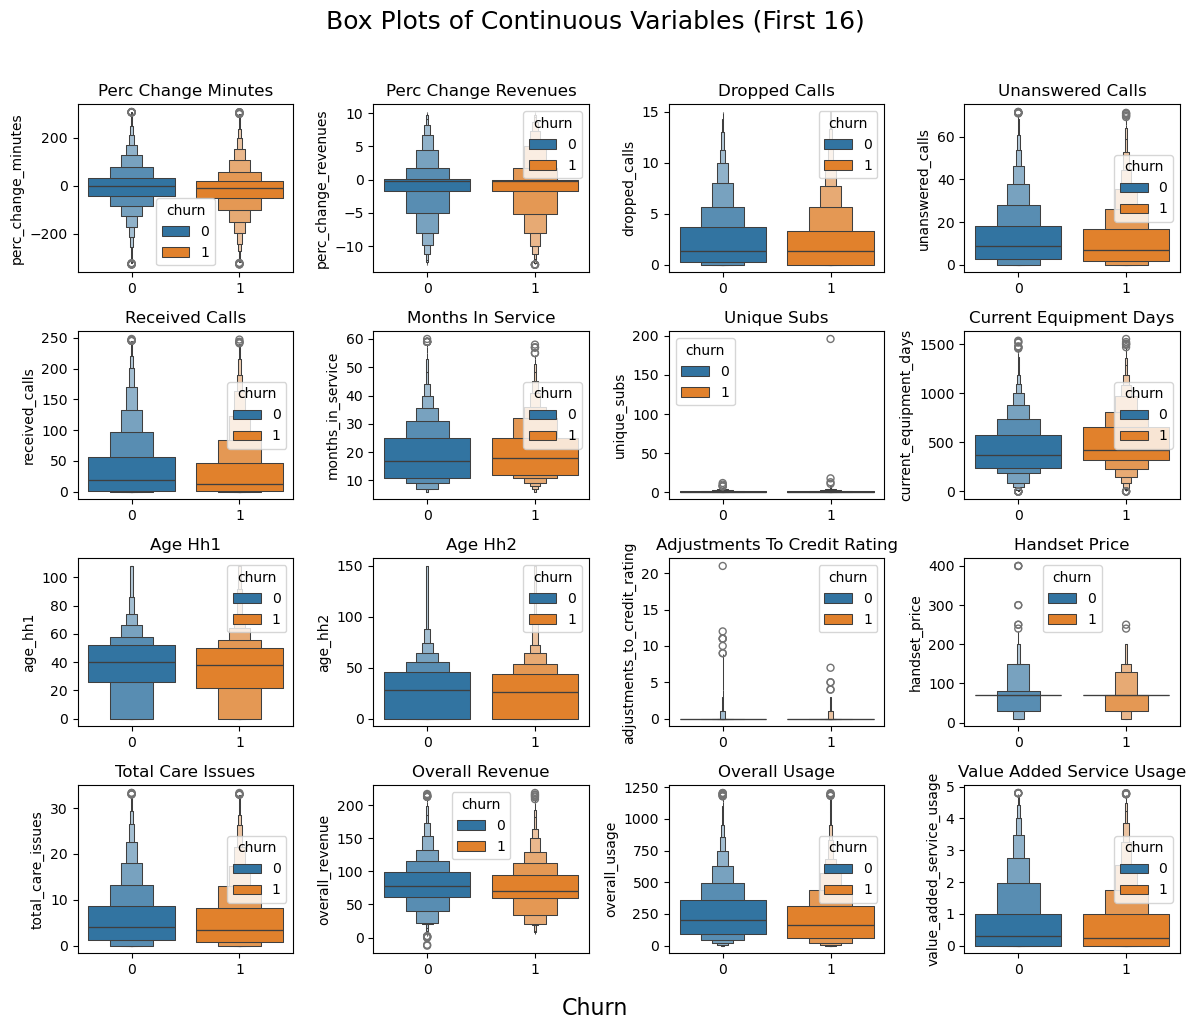

In [23]:
fig, ax = plt.subplots(4, 4, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(), continuous_vars[:16]):

    _=sns.boxenplot(
        x="churn", 
        y=feature, 
        data=train,
        hue='churn', 
        ax=ax
    )
    ax.set_title(split_snake_case(feature).title())
    ax.set_xlabel("")

plt.suptitle("Box Plots of Continuous Variables (First 16)", fontsize = 18, y=1.02)
fig.supxlabel("Churn", fontsize=16)
plt.tight_layout()

In [ ]:
if output_img:
    fig.savefig('./img/m3_fig3c.png', format='png', dpi=300, bbox_inches='tight')

#### Binary Variables

In [24]:
# Remove zero-inflated dummies
binary_vars_to_plot = [var for var in binary_vars if var.split("_")[-1] != 'zero']
binary_vars_to_plot

['children_in_hh',
 'handset_refurbished',
 'handset_web_capable',
 'truck_owner',
 'rv_owner',
 'homeownership',
 'buys_via_mail_order',
 'responds_to_mail_offers',
 'opt_out_mailings',
 'non_us_travel',
 'owns_computer',
 'has_credit_card',
 'new_cellphone_user',
 'owns_motorcycle',
 'made_call_to_retention_team',
 'prizm_code_Rural',
 'prizm_code_Suburban',
 'prizm_code_Town',
 'occupation_Crafts',
 'occupation_Homemaker',
 'occupation_Other',
 'occupation_Professional',
 'occupation_Retired',
 'occupation_Self',
 'occupation_Student',
 'marital_status_Unknown',
 'marital_status_Yes']

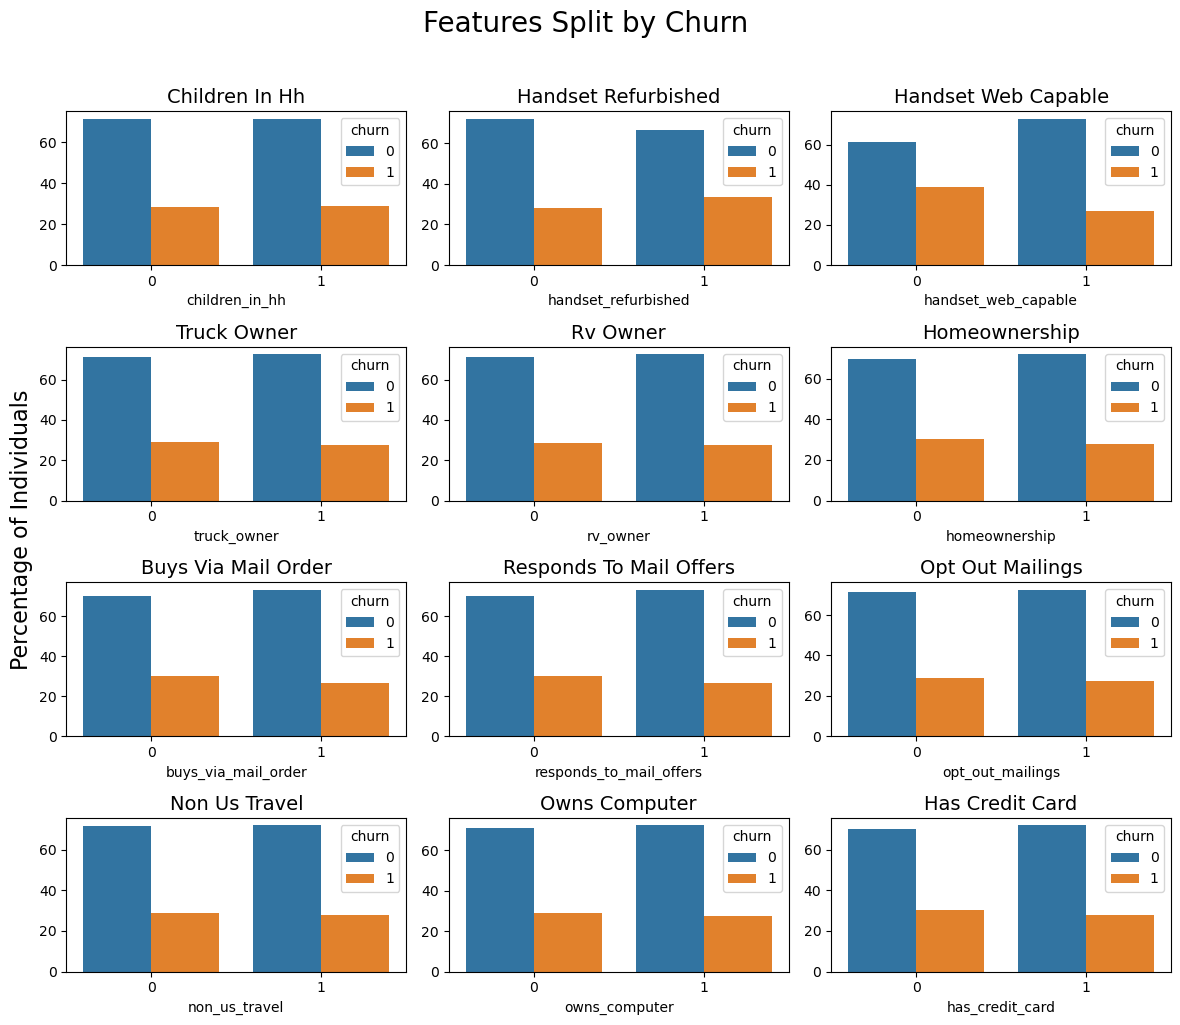

In [25]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(),binary_vars_to_plot[:12]): # Drop Response Variable - Churn
    plot_data = train[[feature, "churn"]]
    grouped_data = plot_data.groupby([feature, "churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_snake_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(f"{feature}")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

In [ ]:
if output_img:
    fig.savefig('./img/m3_fig4.png', format='png', dpi=300, bbox_inches='tight')

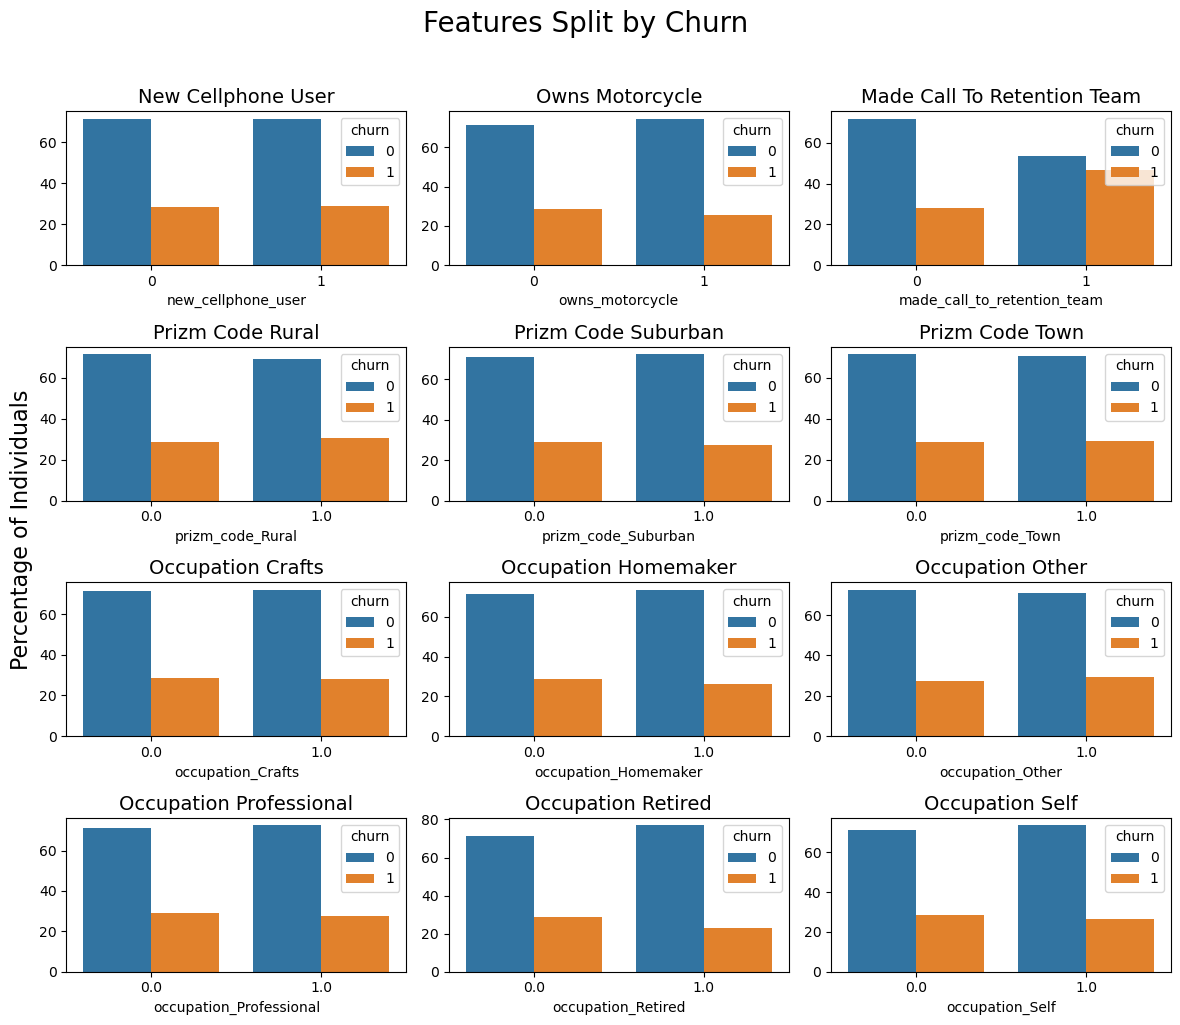

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(),binary_vars_to_plot[12:]): # Drop Response Variable - Churn
    plot_data = train[[feature, "churn"]]
    grouped_data = plot_data.groupby([feature, "churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_snake_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(f"{feature}")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

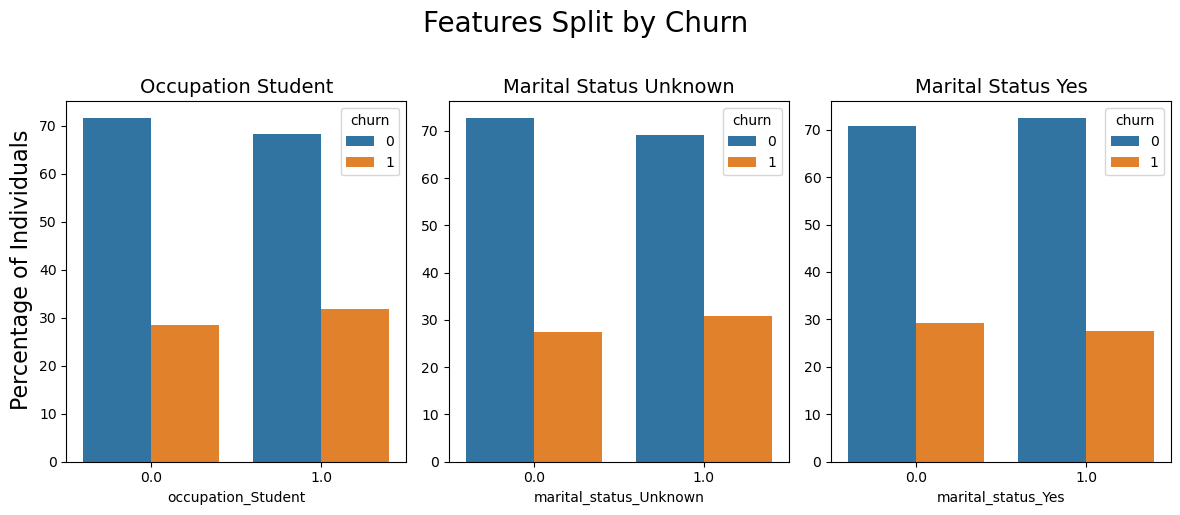

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))  

for ax, feature in zip(ax.ravel(),binary_vars_to_plot[24:]): # Drop Response Variable - Churn
    plot_data = train[[feature, "churn"]]
    grouped_data = plot_data.groupby([feature, "churn"]).size().reset_index(name="count")
    grouped_data["percentage"] = grouped_data.groupby(feature)["count"].transform(lambda x: x / x.sum() * 100)
    
    _ = sns.barplot(
        x=feature, 
        y="percentage",
        hue="churn",
        data=grouped_data,
        ax=ax
    )
    ax.set_title(f"{split_snake_case(feature)}", fontsize=14)
    ax.set_ylabel("")
    ax.set_xlabel(f"{feature}")

fig.supylabel("Percentage of Individuals", fontsize=16)
plt.suptitle("Features Split by Churn", fontsize=20, y=1.02)
plt.tight_layout()

## Exploratory Data Analysis

### Deeper Understanding of the Data

*While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.*

1. Trends: We explored the trend using the only temporal feature "MonthsInService"
   - Initial drop: The churn rate starts around 0.2, drops slightly.
   - Sharp increase: The churn rate increases sharply around the 10 month mark. This could indicate that the users may have some sort of contract that binds them for 10 months.
   - Stablizes: After the spike on the 10th month, churn rate slightly declines and stabilize hovering over 0.2 ~ 0.4 over the next several months.
   - Large fluctuation >50 months: Twards the end, the data shows heavy fluctuation and a spike at the end indicating a potential outlier.
3. Class imbalance: Class imbalance was previously identified and handeled in MS2
4. Outliers:
   - We can identify from the box plot and distribution plots that there are outliers in the dataset. Instead of removing the outliers right now, we'll use different methods such as (1) Cook's distance (if using linear regression) and (2) principal component analysis (PCA) to handle outliers. 
5. Relationship between variables:
   We found strong correlations between features that can lead to multicollinearity. (both shown in the heatmap and pairplots) Later we'll explore methods such as (1) removing one of the correlated features, (2) PCA, (3) feature selection to determine the best method to handle multicollinearity issue.
   - MonthlyRevenue & OverageMinutes: 0.786
   - MonthlyRevenue & MonthlyMinutes: 0.710
   - MonthlyMinutes & ReceivedCalls: 0.828


   However, we didn't find any feature that has direct correlation with Churn. This is interesting as we were expecting at least a weak correlation between some features and churn. It suggests that chrun might depend on more complex interactions between multiple features. 

#### Trends

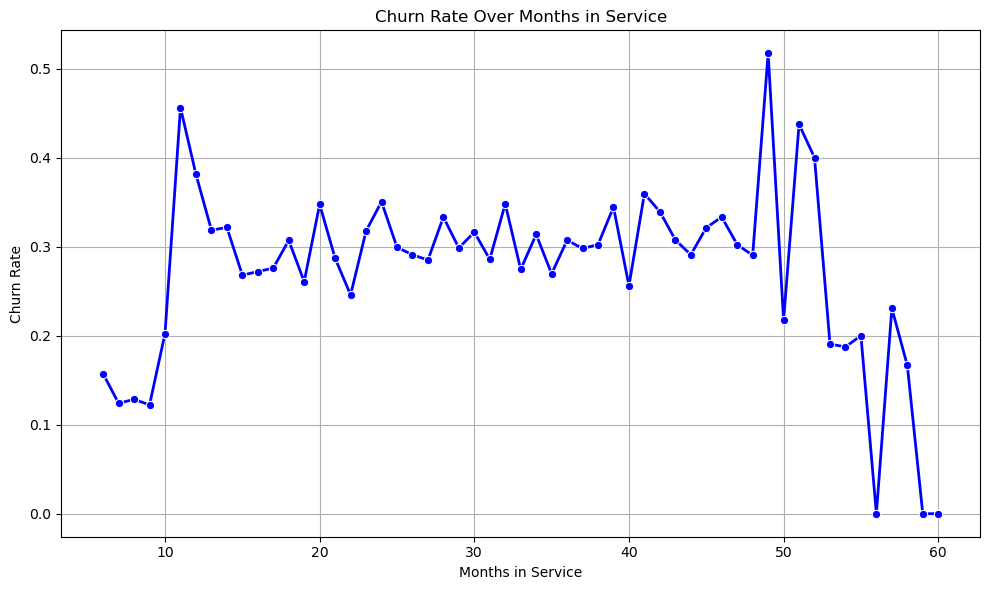

In [ ]:
# Identifying the trend using time trended variable: "MonthsInSerivce"

monthly_churn_rate = train.groupby('months_in_service')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='months_in_service', y='churn', data=monthly_churn_rate, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

plt.title('Churn Rate Over Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.tight_layout();

if output_img:
    plt.savefig('./img/m3_fig5.png', format='png', dpi=300, bbox_inches='tight')



#### Correlation Matrices

In [ ]:
batches = list(zip(list(range(0, len(continuous_vars)+1, 6)), list(range(0, len(continuous_vars)+1, 6))[1:]))

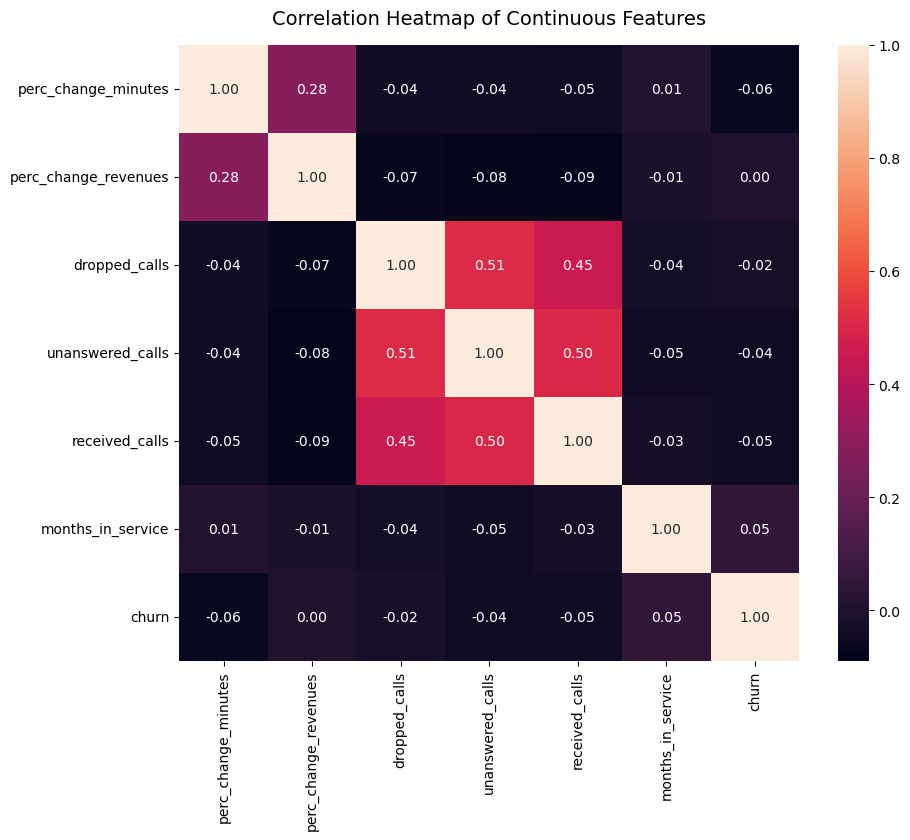

Strong correlations:
                       perc_change_minutes  perc_change_revenues  \
perc_change_minutes                   1.0                   NaN   
perc_change_revenues                  NaN                   1.0   
dropped_calls                         NaN                   NaN   
unanswered_calls                      NaN                   NaN   
received_calls                        NaN                   NaN   
months_in_service                     NaN                   NaN   
churn                                 NaN                   NaN   

                      dropped_calls  unanswered_calls  received_calls  \
perc_change_minutes             NaN               NaN             NaN   
perc_change_revenues            NaN               NaN             NaN   
dropped_calls                   1.0               NaN             NaN   
unanswered_calls                NaN               1.0             NaN   
received_calls                  NaN               NaN             1.0   
mon

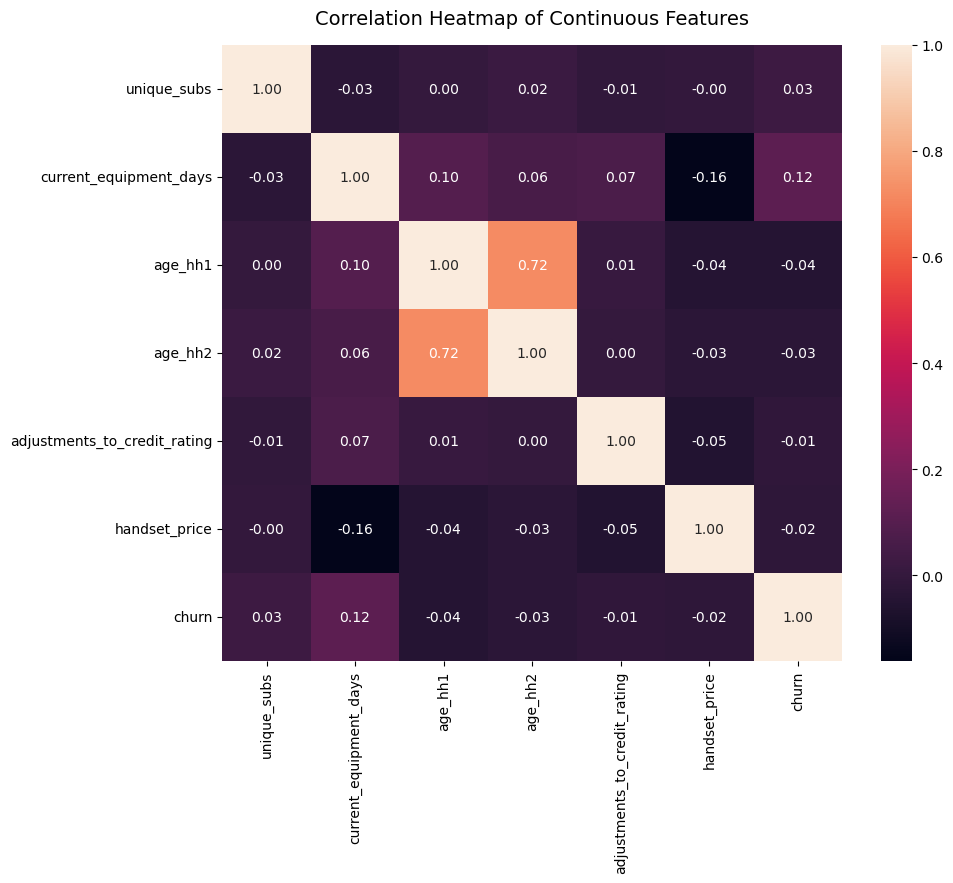

Strong correlations:
                               unique_subs  current_equipment_days   age_hh1  \
unique_subs                           1.0                     NaN       NaN   
current_equipment_days                NaN                     1.0       NaN   
age_hh1                               NaN                     NaN  1.000000   
age_hh2                               NaN                     NaN  0.722293   
adjustments_to_credit_rating          NaN                     NaN       NaN   
handset_price                         NaN                     NaN       NaN   
churn                                 NaN                     NaN       NaN   

                               age_hh2  adjustments_to_credit_rating  \
unique_subs                        NaN                           NaN   
current_equipment_days             NaN                           NaN   
age_hh1                       0.722293                           NaN   
age_hh2                       1.000000                   

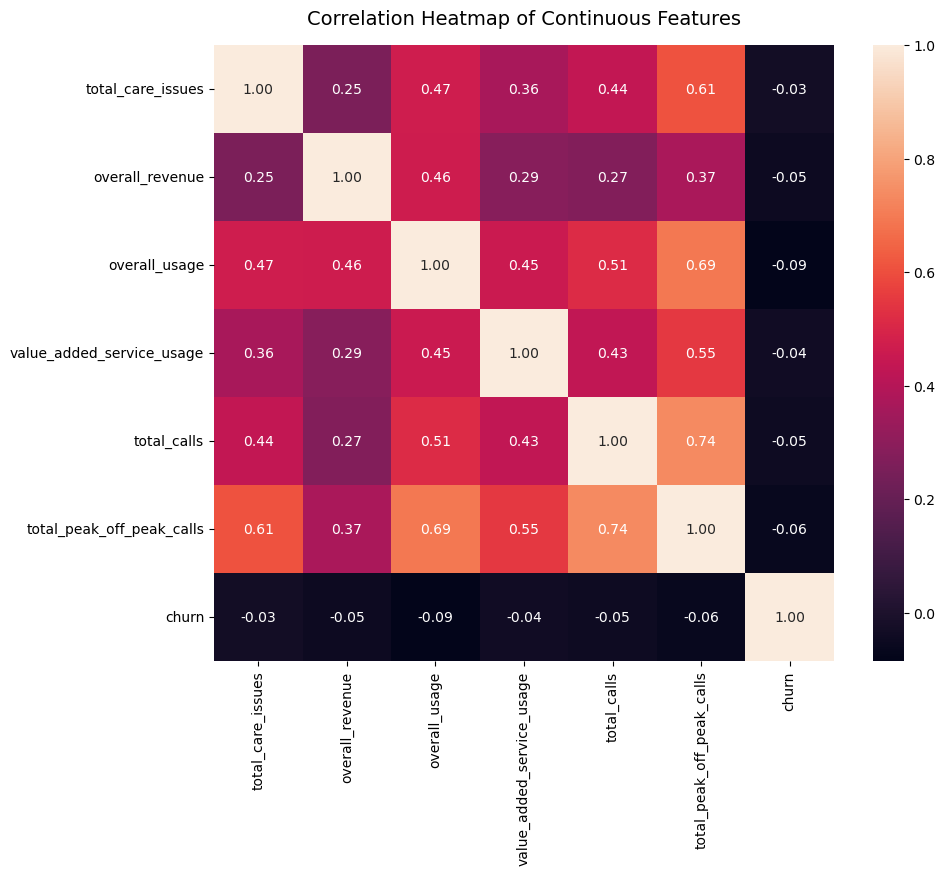

Strong correlations:
                            total_care_issues  overall_revenue  overall_usage  \
total_care_issues                   1.000000              NaN            NaN   
overall_revenue                          NaN              1.0            NaN   
overall_usage                            NaN              NaN        1.00000   
value_added_service_usage                NaN              NaN            NaN   
total_calls                              NaN              NaN            NaN   
total_peak_off_peak_calls           0.608967              NaN        0.69385   
churn                                    NaN              NaN            NaN   

                           value_added_service_usage  total_calls  \
total_care_issues                                NaN          NaN   
overall_revenue                                  NaN          NaN   
overall_usage                                    NaN          NaN   
value_added_service_usage                        1.0         

In [ ]:
# Correlation heatmap for continuous variables

for letter, batch in zip(string.ascii_lowercase, batches):
    correlation_matrix = pd.concat([train[continuous_vars[batch[0]:batch[1]]], train['churn']], axis=1).corr(method='pearson')
    fig, ax = plt.subplots(figsize=(10, 8))  
    sns.heatmap(
        correlation_matrix, 
        annot=True,
        fmt=".2f",
        ax=ax
    )
    ax.set_title('Correlation Heatmap of Continuous Features', fontsize=14, y=1.02)
    plt.show();

    # Identify strong correlations (greater than 0.6 or less than -0.6)
    strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
    print("Strong correlations:\n", strong_corr)

    fig.savefig(f'./img/m3_fig6{letter}.png', format='png', dpi=300, bbox_inches='tight')

In [37]:
# Calculate correlations with response
correlations = train[continuous_vars].corrwith(train["churn"])

# Sort correlations in descending order (absolute values for strength)
sorted_correlations = correlations.abs().sort_values(ascending=False)
top5_features = list(sorted_correlations.head(5).index) + ["churn"]
top5_features

['current_equipment_days',
 'overall_usage',
 'perc_change_minutes',
 'total_peak_off_peak_calls',
 'overall_revenue',
 'churn']

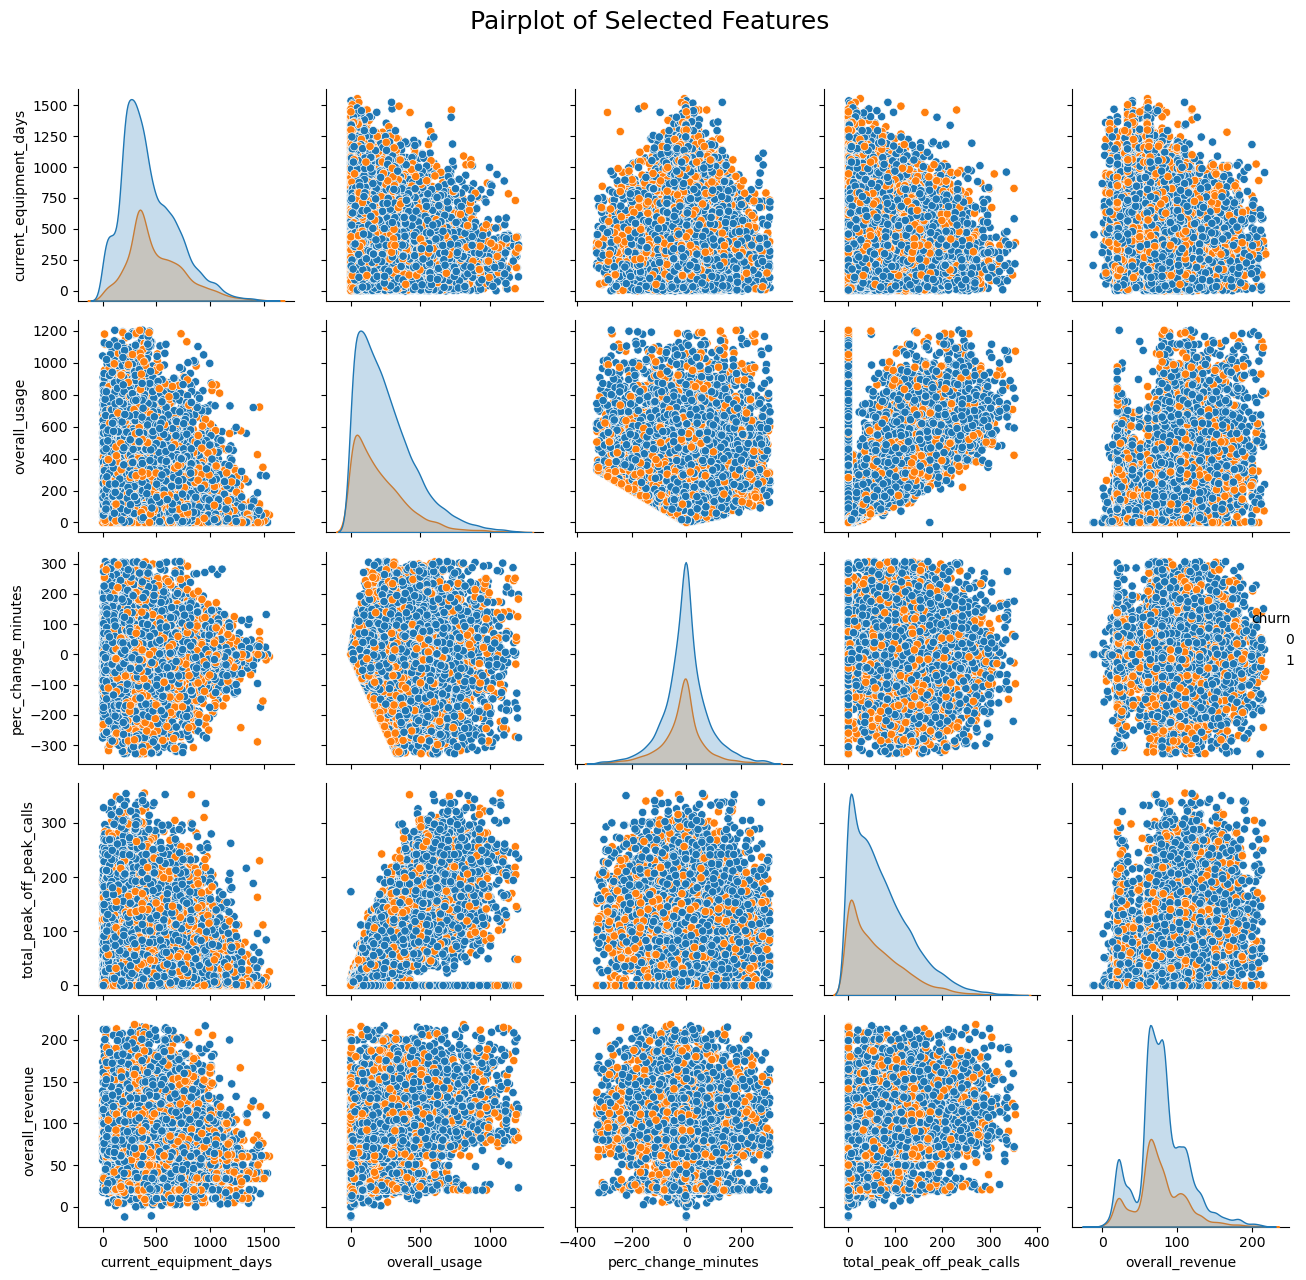

In [38]:
# Pairplot of selected features (can delete them if it is confusing)
pairplot = sns.pairplot(
    train[top5_features], 
    hue='churn'
)
plt.suptitle('Pairplot of Selected Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
if output_img:
    pairplot.savefig(f'./img/m3_fig7.png', format='png', dpi=300, bbox_inches='tight')

### Meaningful Insights

The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

### Noteworthy Findings

Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

#### Service Quality Impact
- Based on the correlation heatmap and pair plot, we don’t see a strong direct correlation between `DroppedCalls` and `Churn`. This suggests that while service quality could impact churn, `DroppedCalls` alone does not show a significant linear relationship with churn.

#### Financial Patterns
- **Revenue & Charges**: The correlation heatmap shows a strong relationship between `MonthlyRevenue` and `OverageMinutes` (0.79), as well as `MonthlyRevenue` and `MonthlyMinutes` (0.71). 
- **Churn Correlation**: There is a very weak or negligible correlation between financial variables like `MonthlyRevenue`, `TotalRecurringCharge`, and churn, suggesting that churn is likely influenced by more complex interactions of these variables rather than a single factor.

#### Demographic Insights
- **Credit Rating**: Credit rating distribution shows a higher density of churn among customers with a medium (2-High) credit rating.
- **Income Group**: Income Group 6 has the highest representation, while Income Group 0 shows a more varied churn rate.

#### Continuous Variables Analysis
- **Monthly Revenue**: The distribution is heavily right-skewed, with most customers having a monthly revenue below.
- **Monthly Minutes**: Similarly right-skewed, showing that most customers have low usage, but a few consume a large number of minutes.
- **Total Recurring Charge**: Right-skewed distribution suggests that most customers have low recurring charges.

#### Churn Trends Over Time
- **10-Month Spike**: The churn rate chart shows a significant increase around the 10-month mark, possibly indicating a contract or milestone prompting churn.
- **Long-Term Fluctuations**: After stabilizing around 20-40% for most of the service period, churn rate experiences fluctuations after 50 months, with a sharp peak at the end. 

#### Correlation Insights
- **Feature Correlations**: The heatmap shows strong correlations between features like `MonthlyRevenue` & `OverageMinutes` (0.79) and `MonthlyMinutes` & `ReceivedCalls` (0.83), indicating potential multicollinearity, which might need addressing in modeling.
- **No Strong Correlation with Churn**: None of the variables exhibit a strong correlation with churn.


## Research Question

Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

1. **"What variables influence churn, and how can these factors be effectively used to predict customer churn?"**

2. **"How do service usage patterns and financial characteristics, such as monthly revenue and overage charges, impact customer churn rates?"**

3. **"What role do demographic factors (such as income, location, and credit rating) play in predicting customer churn?"**



## Baseline Models

This section focuses on the development and evaluation of two baseline models 1) A naive model that predicts random labels based on the class distribution and 2) a bare bones logistic regression model. These two models serve as the baseline metric to beat going forward. A variety of metrics were employed to comprehensively assess the differences in their predictive performance, such as f1-score and accuracy.

### Naive Model

In [234]:
naive_model = DummyClassifier(strategy="stratified")
naive_model.fit(X_train, y_train)
y_pred_naive = naive_model.predict(X_train)

print ("Naive Model - Train Data")
print ("="*53)
print (classification_report(y_train, y_pred_naive))

Naive Model - Train Data
              precision    recall  f1-score   support

           0       0.71      0.71      0.71     14663
           1       0.28      0.27      0.28      5857

    accuracy                           0.59     20520
   macro avg       0.49      0.49      0.49     20520
weighted avg       0.59      0.59      0.59     20520



In [235]:
naive_model = DummyClassifier(strategy="stratified")
naive_model.fit(X_test, y_test)
y_pred_naive = naive_model.predict(X_test)

print ("Naive Model - Test Data")
print ("="*53)
print (classification_report(y_test, y_pred_naive))

Naive Model - Test Data
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      3678
           1       0.27      0.27      0.27      1453

    accuracy                           0.59      5131
   macro avg       0.49      0.49      0.49      5131
weighted avg       0.59      0.59      0.59      5131



### Logistic Regression

The baseline model was designed as a straightforward Logistic Regression model with the following specifications:
- No regularisation (penalty=None).
- Class weights were set to balanced (class_weight="balanced") to address class imbalance.
- The model was trained on a subset of features (top5_features), selected based on their importance.

In [44]:
if "churn" in top5_features:
    top5_features.remove("churn")

In [232]:
logit_model = LogisticRegression(
    penalty=None, random_state=random_state, class_weight="balanced"
)
logit_model.fit(X_train[top5_features], y_train.values.ravel())

y_pred_logit = logit_model.predict(X_train[top5_features])

print("Logit Model - Train Data")
print ("="*53)
print(classification_report(y_train, y_pred_logit))

Logit Model - Train Data
              precision    recall  f1-score   support

           0       0.78      0.57      0.66     14663
           1       0.36      0.59      0.44      5857

    accuracy                           0.58     20520
   macro avg       0.57      0.58      0.55     20520
weighted avg       0.66      0.58      0.60     20520



In [233]:
logit_model = LogisticRegression(
    penalty=None, random_state=random_state, class_weight="balanced"
)
logit_model.fit(X_test[top5_features], y_test.values.ravel())

y_pred_logit = logit_model.predict(X_test[top5_features])

print("Logit Model - Test Data")
print ("="*53)
print(classification_report(y_test, y_pred_logit))

Logit Model - Test Data
              precision    recall  f1-score   support

           0       0.77      0.55      0.65      3678
           1       0.34      0.59      0.43      1453

    accuracy                           0.56      5131
   macro avg       0.56      0.57      0.54      5131
weighted avg       0.65      0.56      0.59      5131



The performance of the baseline logistic regression reveals challenges due to class imbalance, with class 0 (14,663 samples) dominating class 1 (5,857 samples). The model achieves a modest overall accuracy of 0.58, performing better on class 0 (precision: 0.78, recall: 0.57) compared to class 1 (precision: 0.36, recall: 0.59). 

The low f1-score of 0.44 for class 1 highlights difficulties in effectively distinguishing the minority class, likely caused by overlapping feature distributions or inadequate class representation.

The macro average metrics (precision: 0.57, recall: 0.58, F1-score: 0.55) indicate moderate performance across both classes, while the weighted averages slightly favour class 0. To improve, techniques like oversampling (e.g., SMOTE), feature engineering, or hyperparameter tuning should be employed. 

## Models

### Tuned Logistic Regression
Learning form the baseline model, the improved model employs advanced techniques to enhance performance:
- L1 Regularisation (penalty="l1") was applied to facilitate feature selection.
- The $C = \frac{1}{\lambda}$ hyperparameter was optimised using cross-validation with LogisticRegressionCV.
- The training dataset was pre-processed to ensure balanced class distributions, improving model robustness.
- The solver `liblinear` was selected because it had no convergence issues.
- PCA was used on binary variables to reduce dimensionality and improve model performance. 90% of the variance was retained.

For the model pipeline, the following steps were implemented:
1. Scaling: we scale before SMOTE to prevent data leakage because if we scale after SMOTE, we're giving information to the scaler about the data generation process of SMOTE. Another way to put it, the mean and standard deviation that is computed from the SMOTE data provides information about how SMOTE was generated and therefore, the model will be able to pick up on that.
2. SMOTE: we oversample the minority class to balance the class distribution.
3. Logistic Regression: we fit the model using the optimised hyperparameters.
4. We use a pipeline to ensure that the SMOTE operates only on the training data and is not applied to the test data

Source:
https://stackoverflow.com/questions/77446462/the-right-way-of-using-smote-in-classification-problems

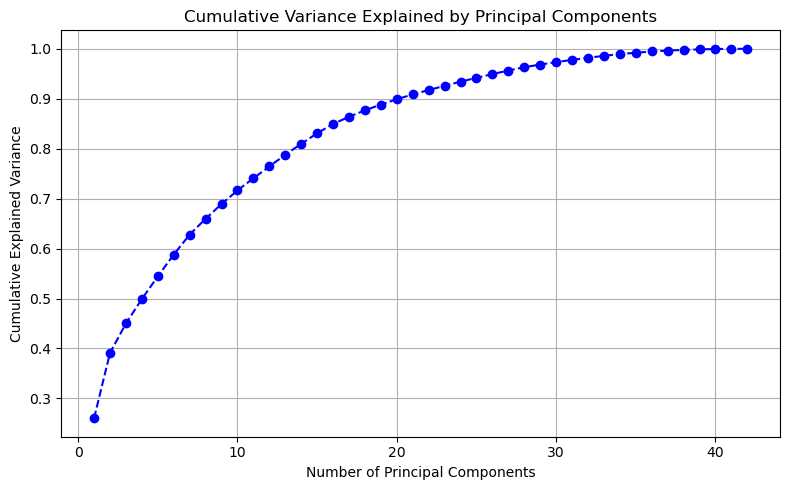

21 components explain 90.0% of the variance.


In [115]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
pca.fit(X_train[binary_vars])

# Plot the cumulative explained variance, scree plot
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select components that explain 90% of the variance
cutoff = 0.90
best_n_components = np.argmax(cumulative_variance > cutoff) + 1
print (f"{best_n_components} components explain {cutoff*100}% of the variance.")


In [168]:
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

nonbinary_vars = [var for var in continuous_vars if var not in binary_vars]

numeric_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), nonbinary_vars),
        ('pca', PCA(n_components=best_n_components), binary_vars)
    ], 
    remainder='passthrough', #binary variables passthrough
)

pipeline = Pipeline(
    steps=[
        ('preprocessor', numeric_transformer),
        ("smote", SMOTE(sampling_strategy="auto", random_state=random_state)),
        (
            "clf",
            LogisticRegressionCV(
                Cs=np.logspace(-6, 6, 13),
                cv=5,
                penalty="l1",
                solver="liblinear",
                random_state=random_state,
                max_iter=2000,
                n_jobs=-1,
                class_weight="balanced",
                scoring="accuracy",
            ),
        ),
    ]
)


pipeline.fit(X_train, y_train.values.ravel())

print(
    "Train Accuracy: {:.4f}".format(pipeline.score(X_train, y_train)),
)


Train Accuracy: 0.6011


In [218]:
# Get out the components of the pipelines
X_train_scaled = pipeline.named_steps["preprocessor"].transform(X_train)
X_train_smote, y_train_smote = pipeline.named_steps["smote"].fit_resample(X_train_scaled, y_train)

X_test_scaled = pipeline.named_steps["preprocessor"].transform(X_test)
X_test_smote, _ = pipeline.named_steps["smote"].fit_resample(X_test_scaled, y_test)

best_logit_model = pipeline.named_steps["clf"]


#### Classification Report 

##### Train Set

In [170]:
# classification report using train data
y_train_pred_logit = pipeline.predict(X_train)
print("Classification Report on Training Data:")
print(classification_report(y_train, y_train_pred_logit , zero_division=0))

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68     14663
           1       0.37      0.60      0.46      5857

    accuracy                           0.60     20520
   macro avg       0.58      0.60      0.57     20520
weighted avg       0.67      0.60      0.62     20520



##### Test Set

In [171]:
# classification report using test data
y_test_pred_logit = pipeline.predict(X_test)
print("Classification Report on Test Data:")
print(classification_report(y_test, y_test_pred_logit, zero_division=0))


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      3678
           1       0.35      0.56      0.43      1453

    accuracy                           0.58      5131
   macro avg       0.56      0.58      0.55      5131
weighted avg       0.65      0.58      0.60      5131



The model performs consistently across training (accuracy: 0.60) and test datasets (accuracy: 0.58), demonstrating the model is not overfitting since the two values are close. Comparing the tuned logit to the baseline logit we see a slight improvement across the train and test sets for all metrics.

**Model Performance:**

| Metric         | Baseline Logit | Tuned Logit |
|----------------|----------------|-------------|
| Train Accuracy | 0.58           | 0.60        |
| Test Accuracy  | 0.56           | 0.58        |
| Train F1 Score | 0.55           | 0.57        |
| Test F1 Score  | 0.54           | 0.55        |

#### Confusion Matrix

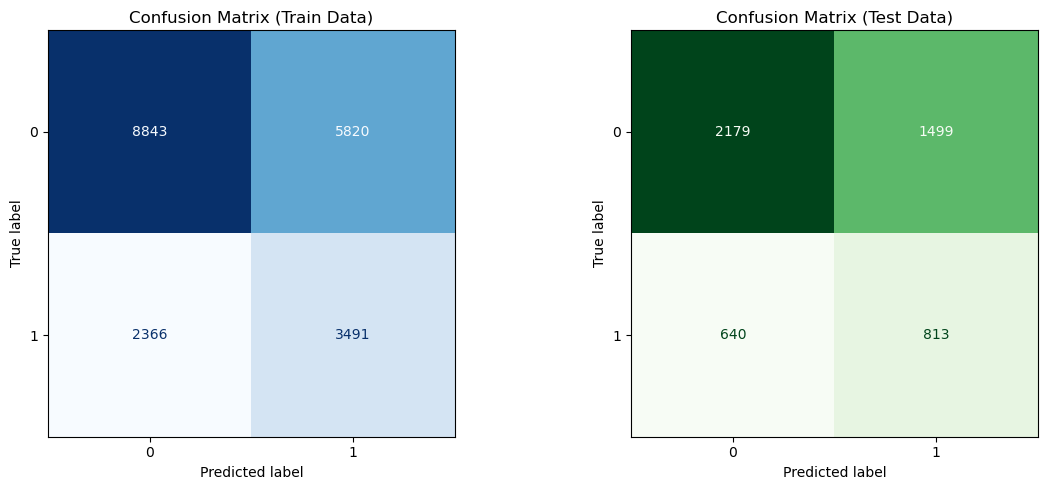

In [172]:
# CM Train data
cm_train = confusion_matrix(y_train, y_train_pred_logit)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=pipeline.classes_)

#  CM Test Data
cm_test = confusion_matrix(y_test, y_test_pred_logit)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=pipeline.classes_)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp_train.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix (Train Data)')

disp_test.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title('Confusion Matrix (Test Data)')
plt.tight_layout()

The confusion matrices reveal consistent performance across training and test datasets. 

Overall the model does pretty poorly, especially with regards to false positives. True negatives look decent but ideally we would want more values in the diagonals. The number of false negatives is decent but just barely. 

#### Feature Importance 

In [203]:
# extract features that have coefficient > shreshold
coefficients = best_logit_model.coef_.flatten()
threshold = 0.2
selected_features = [
    feature
    for feature, coef in zip(X_train.columns, coefficients)
    if abs(coef) > threshold
]
selected_coefficients = [coef for coef in coefficients if abs(coef) > threshold]

top_coefficients = pd.DataFrame(
    {"feature": selected_features, "coefficient": selected_coefficients}
).sort_values("coefficient", ascending=True, key=abs)

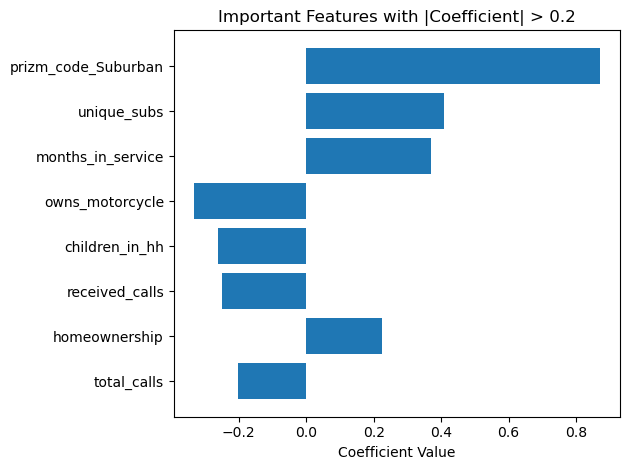

In [204]:
plt.barh(top_coefficients["feature"], top_coefficients["coefficient"])
plt.xlabel('Coefficient Value')
plt.title(f'Important Features with |Coefficient| > {threshold}')
plt.tight_layout()

The top features based on coefficients are shown above. These are the ones with an absolute magnitude greater than 0.2. Interesting, the dummy for suburban is the most important feature followed by unique subscribers. Months in service makes sense because it might be reflecting the end of the phone contract.

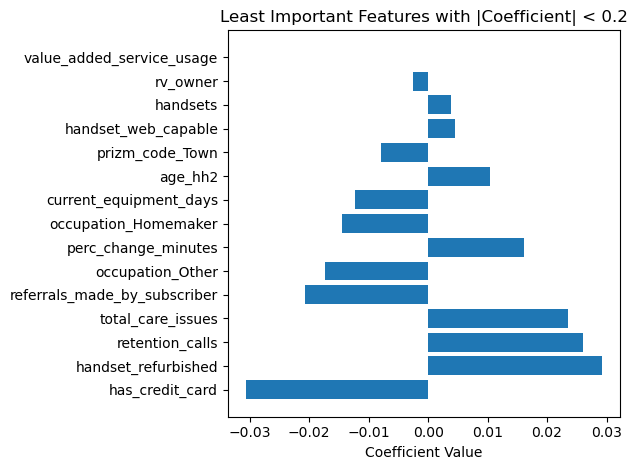

In [226]:
filtered_coefficients = [coef for coef in coefficients if abs(coef) < 0.1]
filtered_features = [
    feature for feature, coef in zip(X_train.columns, coefficients) if abs(coef) < 0.1
]

bottom_coefficients = pd.DataFrame(
    {"feature": filtered_features, "coefficient": filtered_coefficients}
).sort_values("coefficient", ascending=False, key=abs).tail(15)

plt.barh(bottom_coefficients["feature"], bottom_coefficients["coefficient"])
plt.xlabel("Coefficient Value")
plt.title(f"Least Important Features with |Coefficient| < {threshold}")
plt.tight_layout()

The model identified 7 features with coefficients close to zero (∣coefficient∣<0.01), indicating these features have minimal influence on the model's predictions.  At the top we have value added service usage which was shrunk to zero by the L1 regularisation. RV owner makes sense because that seems unlikely to predict churn. Interestingly retention calls don't seem to have a strong effect on churn.

While these features may not significantly impact the overall performance, they could still provide domain-specific insights. 

#### Model Performance: AUC-ROC Curve


In [214]:
def plot_roc_curves_binary(models, X, y_trues, data_label = 'Train'):
    plt.figure(figsize=(7, 5))
    
    # Dictionary to store AUC for each model
    aucs = {}
    
    for name, model in models.items():
        # Get probability predictions (we want probability of class 1)
        # y_score = cross_val_predict(model, X[name], y_true, method='predict_proba', cv=5)[:, 1]
        y_score = model.predict_proba(X[name])[:, 1]
        y_true = y_trues[name]
        
        # Calculate ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_true, y_score)

        roc_auc = roc_auc_score(y_true, y_score)
        
        aucs[name] = roc_auc_score(y_true, y_score)
        
        # Plot ROC curve for this model
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')
    
    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {data_label}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    return aucs

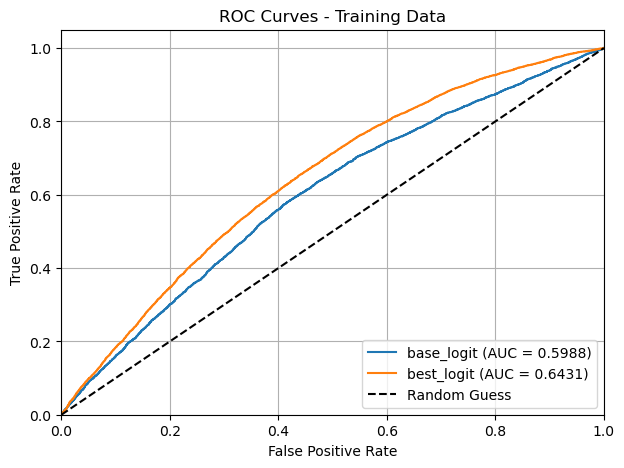

In [221]:
models = {
    'base_logit': logit_model,
    'best_logit': best_logit_model,
}
X_trains = {
    'base_logit': X_train[top5_features],
    'best_logit': X_train_smote,
}

y_trains = {
    'base_logit': y_train,
    'best_logit': y_train_smote,
}

aucs = plot_roc_curves_binary(models, X_trains, y_trains, data_label='Training Data')

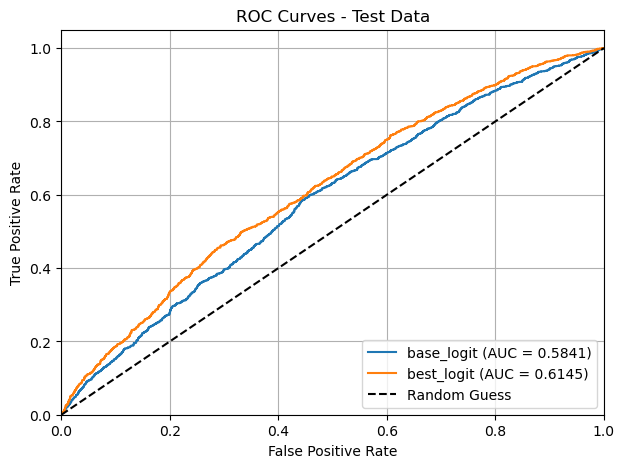

In [225]:
models = {
    'base_logit': logit_model,
    'best_logit': best_logit_model,
}
X_trains = {
    'base_logit': X_test[top5_features],
    'best_logit': X_test_scaled,
}

y_trains = {
    'base_logit': y_test,
    'best_logit': y_test,
}

aucs = plot_roc_curves_binary(models, X_trains, y_trains, data_label='Test Data')

The ROC curve comparison demonstrates a clear improvement in performance between the our tuned logistic model and the Baseline Model. The Baseline Model achieves an AUC of 0.5988 on the training data and 0.5841 on the test data, indicating weak discriminatory power and limited generalisation capability. In contrast, the Improved Model shows substantial gains, with an AUC of 0.6431 on the training data and 0.6145 on the test data, reflecting its stronger ability to distinguish between classes and generalise effectively. 

### Random Forest

The goal is to use a decision tree to analyze the relationship between maximum depth and cross-validation scores. While the primary model will be a random forest for fitting and tuning, the decision tree's visualization helps illustrate how the cross-validation score declines as the maximum depth increases. This provides a clear representation of the trade-off, showing how higher depths typically lead to increased variance and overfitting.

The next step involves optimizing the random forest model by identifying the best parameters. We utilized GridSearchCV to determine the optimal parameters and applied them to tune the random forest model. This process will help evaluate both the training score and the Out-of-Bag (OOB) score for the model.

In [166]:
#Load data 
X_train_rf = X_train
y_train_rf = y_train
X_test_rf = X_test


print("\n X_train shape",X_train_rf.shape)
print("\n X_test shape",X_test_rf.shape)


 X_train shape (20520, 69)

 X_test shape (5131, 69)


In [167]:
print("Sample train data\n")
X_train_rf.head()


Sample train data



customer_id  perc_change_minutes  perc_change_revenues  dropped_calls  \
0      3153578                 98.0                   0.2            2.3   
1      3163414                -38.0                  -0.4            3.0   
2      3348322                 13.0                  -0.9            6.3   
3      3269774                  0.0                   0.0            0.0   
4      3283286               -122.0                  -5.5            0.0   

   unanswered_calls  received_calls  months_in_service  unique_subs  \
0               9.7            50.3                 16            1   
1              10.3            95.1                 16            1   
2              10.0             7.2                 10            1   
3               0.0             0.0                 13            1   
4               0.0             0.0                  8            1   

   active_subs  handsets  handset_models  current_equipment_days  age_hh1  \
0            1       1.0             1.0                   501.0     26.0   
1            1       1.0             1.0                   478.0     46.0   
2            1       1.0             1.0                   291.0     58.0   
3            1       1.0             1.0                   384.0      0.0   
4            1       1.0             1.0                   253.0     50.0   

   age_hh2  children_in_hh  handset_refurbished  handset_web_capable  \
0      0.0               0                    0                    1   
1      0.0               0                    0                    1   
2     58.0               0                    0                    1   
3      0.0               0                    0                    1   
4     48.0               1                    0                    1   

   truck_owner  rv_owner  homeownership  buys_via_mail_order  \
0            0         0              1                    0   
1            0         0              1                    1   
2            0         0              1                    1   
3            0         0              0                    0   
4            0         0              1                    1   

   responds_to_mail_offers  opt_out_mailings  non_us_travel  owns_computer  \
0                        0                 0              0              0   
1                        1                 0              0              0   
2                        1                 0              0              1   
3                        0                 0              0              0   
4                        1                 0              1              0   

   has_credit_card  retention_calls  retention_offers_accepted  \
0                0                0                          0   
1                1                0                          0   
2                1                0                          0   
3                0                0                          0   
4                1                0                          0   

   new_cellphone_user  referrals_made_by_subscriber  income_group  \
0                   1                             0             4   
1                   0                             0             8   
2                   0                             0             7   
3                   0                             0             0   
4                   0                             0             1   

   owns_motorcycle  adjustments_to_credit_rating  handset_price  \
0                0                             0       71.06962   
1                0                             0       71.06962   
2                0                             0       71.06962   
3                0                             0       71.06962   
4                0                             0       71.06962   

   made_call_to_retention_team  credit_rating  total_care_issues  \
0                            0              2                2.6   
1                 

In [168]:
y_train_rf.head()

churn
0      0
1      0
2      0
3      0
4      0

In [ ]:
#Balance data using SMOTE
smote = SMOTE(sampling_strategy='auto')
xtrain_postSMOTE, y_train = smote.fit_resample(X_train, y_train)
xtest_postSMOTE, ytest_postSMOTE = smote.fit_resample(X_test, y_test)

# Convert resampled data into DataFrames for later use
if isinstance(X_train, pd.DataFrame):  
    xtrain_postSMOTE_df = pd.DataFrame(xtrain_postSMOTE, columns=X_train.columns)
else:
    xtrain_postSMOTE_df = pd.DataFrame(xtrain_postSMOTE)

if isinstance(X_test, pd.DataFrame):  
    xtest_postSMOTE_df = pd.DataFrame(xtest_postSMOTE, columns=X_test.columns)
else:
    xtest_postSMOTE_df = pd.DataFrame(xtest_postSMOTE)

#convert to 1D array
y_train = y_train['churn']
ytest_postSMOTE = ytest_postSMOTE['churn']



print("\nBefore SMOTE(Train):\n", y_train.value_counts())  
print("\nAfter SMOTE(Train):\n", y_train.value_counts())


print("Before SMOTE(Test):\n", y_test.value_counts())  
print("\nAfter SMOTE(Test):\n", ytest_postSMOTE.value_counts())



Before SMOTE(Train):
 churn
0        14663
1         5857
Name: count, dtype: int64

After SMOTE(Train):
 churn
0    14663
1    14663
Name: count, dtype: int64
Before SMOTE(Test):
 churn
0        3678
1        1453
Name: count, dtype: int64

After SMOTE(Test):
 churn
1    3678
0    3678
Name: count, dtype: int64


In [ ]:
#Start with the decision tree baseline with cv =5.   This is for getting the accuracy vs Max_depth only.
criterion = ['gini', 'entropy']

first_depth = 2
final_depth = 30
step = 2


results = []
for cur_criterion in criterion:      
    for max_depth in range(first_depth, final_depth+1, step):
        dt = DecisionTreeClassifier(criterion=cur_criterion , max_depth=max_depth,random_state=109)
        scores = cross_val_score(estimator=dt, X=xtrain_postSMOTE_df, y=y_train, cv=5, n_jobs=-1)
        
        cur_results = {'criterion': cur_criterion,
                      'depth': max_depth,
                      'all_cv': scores,
                      'mean_cv': scores.mean()}
        results.append(cur_results)
dt = pd.DataFrame(results)

In [204]:
#Use code from lab
df_gini = dt[dt['criterion'] == 'gini']
df_entropy = dt[dt['criterion'] == 'entropy']

x_gini = df_gini['depth'].values.astype(float)
y_gini = df_gini['mean_cv'].values.astype(float)

x_entropy = df_entropy['depth'].values.astype(float)
y_entropy = df_entropy['mean_cv'].values.astype(float)

stds_gini = np.array([ np.std(scores) for scores in df_gini['all_cv']], dtype = float) 
stds_entropy = np.array([ np.std(scores) for scores in df_entropy['all_cv']], dtype = float)

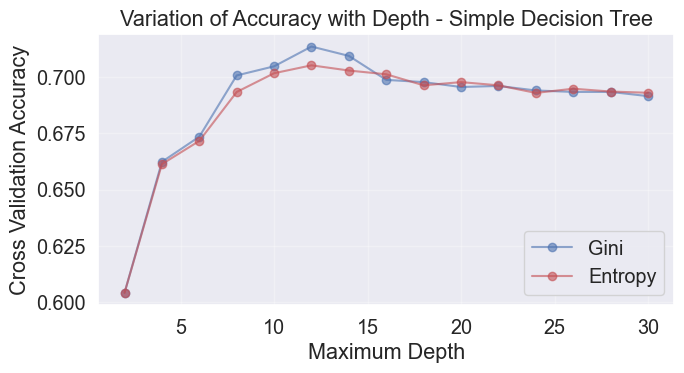

In [171]:
plt.figure(figsize=(7, 4))

plt.plot(dt[dt.criterion == 'gini'].depth,
         dt[dt.criterion == 'gini'].mean_cv, 'b-', marker='o', alpha = 0.6, label='Gini')
plt.plot(dt[dt.criterion == 'entropy'].depth,
         dt[dt.criterion == 'entropy'].mean_cv, 'r-', marker='o', alpha = 0.6, label='Entropy')
plt.ylabel("Cross Validation Accuracy")
plt.xlabel("Maximum Depth")
plt.title('Variation of Accuracy with Depth - Simple Decision Tree')
plt.legend()
plt.grid(alpha = 0.3)

plt.tight_layout()

In [172]:
#Finding the best hyper parameter

mean_CV_acc_gini = df_gini['mean_cv']
mean_CV_acc_entropy = df_entropy['mean_cv']

best_idx_gini = np.argmax(mean_CV_acc_gini)
best_idx_entropy = np.argmax(mean_CV_acc_entropy)

best_depth_gini = df_gini['depth'].iloc[best_idx_gini]
best_depth_entropy = df_entropy['depth'].iloc[best_idx_entropy]

print('The best depth based on Gini impurity was found to be: ', best_depth_gini)
print('The best depth based on Entropy was found to be: ', best_depth_entropy)

The best depth based on Gini impurity was found to be:  12
The best depth based on Entropy was found to be:  12


#### Determine Best parameters by GridSearchCV

This grid search is set up to find the best parameters for a Random Forest model. We included **`max_depth`** to control the tree size and avoid underfitting or overfitting, depending on how deep the trees are. The **`min_impurity_decrease`** parameter ensures that splits are only made if they actually improve the model, which helps keep the tree meaningful. The **`max_features`**, **`min_samples_split`**, and **`min_samples_leaf`** parameters are there to fine-tune how the model splits the data, which is important because our dataset has a lot of features and might be imbalanced. We also included both **`gini`** and **`entropy`** to see which works better for splitting the data. Finally, using 5-fold cross-validation makes sure the model is tested properly for every parameter combination.

In [ ]:
#Determine the best parameter using grid search

rf2 = GridSearchCV(estimator=RandomForestClassifier(random_state=109,n_estimators=100),
                  param_grid={'max_depth': [6,8,10,12,14,16,18,20],
                    'min_impurity_decrease': [0.001, 0.01, 0.1],
                    'max_features': ['sqrt', 'log2'],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 5, 10],
                    'criterion':['gini','entropy']},
                  cv=5,scoring = 'accuracy',n_jobs=-1)

rf2.fit(xtrain_postSMOTE_df, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=109),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_impurity_decrease': [0.001, 0.01, 0.1],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [183]:
# Get the best parameters
print("Best Parameters:", rf2.best_params_)
print(f"Best Score:: {rf2.best_score_:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_impurity_decrease': 0.001, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Score:: 0.7473


In [ ]:
#Use the best parameters from previous step to train a tuned  model. 

RF_tuned1 = RandomForestClassifier(
    max_depth=12,
    max_features = 'sqrt',
    min_impurity_decrease = 0.001,
    n_estimators=100,
    min_samples_leaf=10,
    min_samples_split =2,
    criterion = 'entropy',
    random_state=109,
    oob_score=True,
    class_weight='balanced'
)


cv_scores = cross_val_score(RF_tuned1, xtrain_postSMOTE_df,
                             y_train, cv=5, scoring='accuracy')


RF_tuned1.fit(xtrain_postSMOTE_df, y_train)

# Make predictions
ytrain_predRF = RF_tuned1.predict(xtrain_postSMOTE_df)  # Predictions on training data
ytest_predRF = RF_tuned1.predict(xtest_postSMOTE_df)   # Predictions on test data

# Evaluate the model
RFtrain_score = accuracy_score(y_train, ytrain_predRF)
RFtest_score = accuracy_score(ytest_postSMOTE, ytest_predRF)


print(f'Train Score: {RFtrain_score:.4f}')
print(f'Test Score: {RFtest_score:.4f}')
print(f"OOB Score for Final Model: {RF_tuned1.oob_score_:.4f}")

# Add Classification Report
print("\nClassification Report (Train):")
print(classification_report(y_train, ytrain_predRF))

print("\nClassification Report (Test):")
print(classification_report(ytest_postSMOTE, ytest_predRF))



Train Score: 0.7675
Test Score: 0.7664
OOB Score for Final Model: 0.7619

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.70      0.93      0.80     14663
           1       0.90      0.60      0.72     14663

    accuracy                           0.77     29326
   macro avg       0.80      0.77      0.76     29326
weighted avg       0.80      0.77      0.76     29326


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.70      0.93      0.80      3678
           1       0.90      0.60      0.72      3678

    accuracy                           0.77      7356
   macro avg       0.80      0.77      0.76      7356
weighted avg       0.80      0.77      0.76      7356



Text(0.5, 1.0, 'Confusion Matrix - Test')

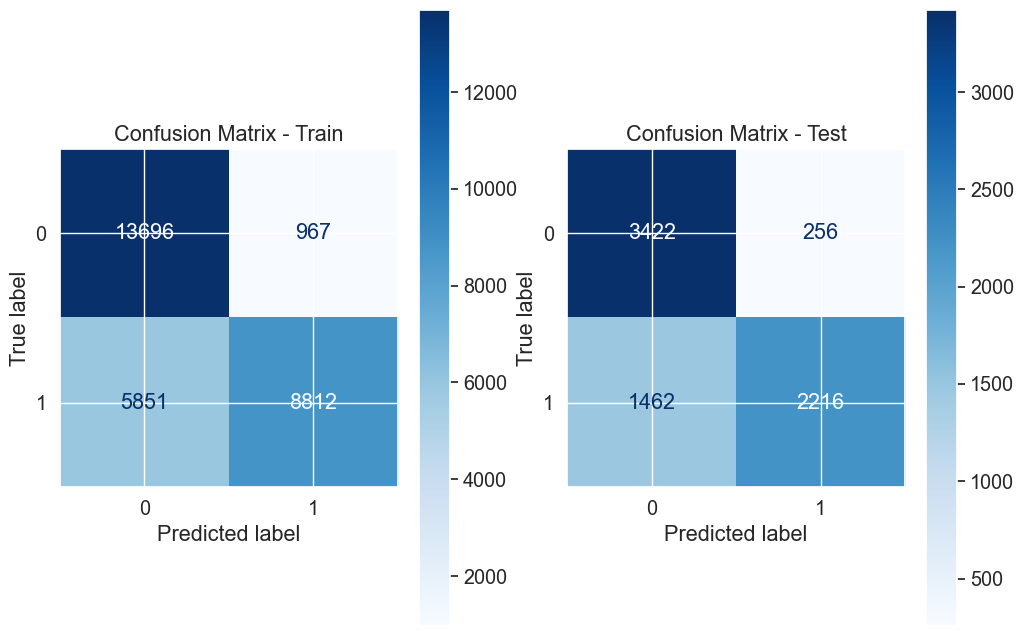

In [ ]:
# Create subplots for train and test confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))  
# Train Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_train, 
    ytrain_predRF,
    cmap=plt.cm.Blues, 
    ax=axes[0]
)
axes[0].set_title('Confusion Matrix - Train')

# Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions( 
    ytest_postSMOTE, 
    ytest_predRF, 
    cmap=plt.cm.Blues, 
    ax=axes[1]
)
axes[1].set_title('Confusion Matrix - Test')

The model performs well in identifying Non-Churn customers, as indicated by the high recall (0.93) on both train and test datasets. However, the precision for Non-Churn is moderate (0.70), meaning some Churn cases are misclassified as Non-Churn. For Churn (Class 1), the model shows high precision (0.90), meaning that when the model predicts Churn, it is often correct. However, the recall for Churn is lower (0.6), indicating that many actual Churn cases are not identified by the model. The overall accuracy is consistent across train and test datasets (0.77), suggesting that the model generalizes well and is not overfitting. Despite this, the model struggles with recall for the minority class (Churn), which is a common issue in imbalanced datasets.  

** Still need to investigate on poor recall **  (To be updated)

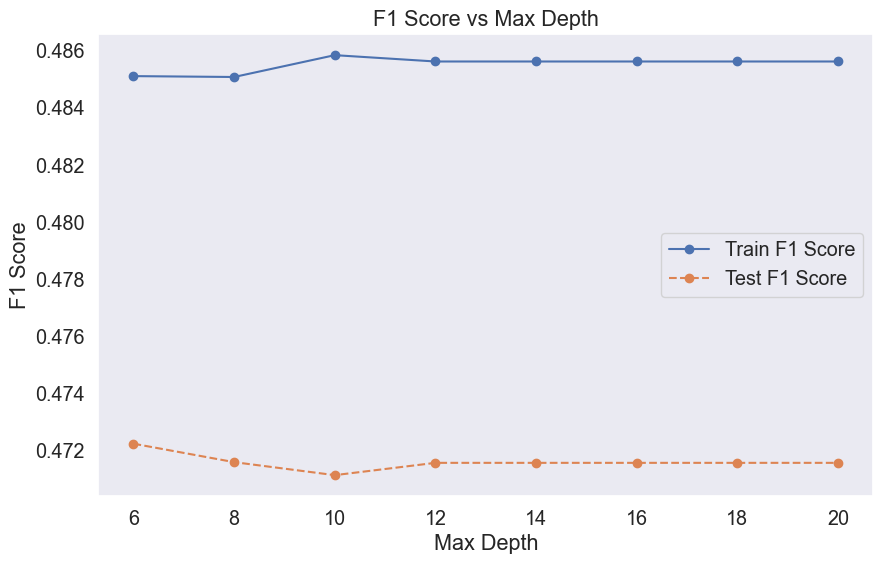

In [ ]:
#plot F1 score with max_depth   (I am not sure if it is good to keep. using F1 the score is less. )

# Range of max_depth values to test
max_depth_values = [6, 8, 10, 12, 14, 16, 18, 20]

# Lists to store F1 scores
f1_scores_train = []
f1_scores_test = []

# Loop through each max_depth value
for max_depth in max_depth_values:
    # Train a Random Forest model with the current max_depth
    f1_model = RandomForestClassifier(max_depth=max_depth, random_state=109, n_estimators=100,
        max_features = 'sqrt',
        min_impurity_decrease = 0.001,
        min_samples_leaf=10,
        min_samples_split =2,
        criterion = 'entropy',
        oob_score=True,
        class_weight='balanced')

    f1_model.fit(X_train, y_train['churn'])
    
    # Make predictions
    y_train_pred1 = f1_model.predict(X_train)
    y_test_pred1 = f1_model.predict(X_test)
    
    # Calculate F1 scores
    f1_train = f1_score(y_train, y_train_pred1, average='binary') 
    f1_test = f1_score(y_test, y_test_pred1, average='binary')
    
    # Store the scores
    f1_scores_train.append(f1_train)
    f1_scores_test.append(f1_test)

# Plot F1 scores vs max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, f1_scores_train, label='Train F1 Score', marker='o', linestyle='-')
plt.plot(max_depth_values, f1_scores_test, label='Test F1 Score', marker='o', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Max Depth')
plt.legend()
plt.grid()
plt.show()


### Extract Feature Importance from the model

In [187]:
#Top 20 Feature
feature_importance = pd.DataFrame({
    'Feature': xtrain_postSMOTE_df.columns,  
    'Importance': RF_tuned1.feature_importances_  
}).sort_values(by='Importance', ascending=False)


print(feature_importance.head(20))

                    Feature  Importance
53       marital_status_Yes    0.124605
52   marital_status_Unknown    0.108835
47         occupation_Other    0.091244
43      prizm_code_Suburban    0.079028
13                  age_hh2    0.057497
11   current_equipment_days    0.054290
48  occupation_Professional    0.049923
20      buys_via_mail_order    0.039813
16      handset_web_capable    0.036702
6         months_in_service    0.031439
44          prizm_code_Town    0.031043
12                  age_hh1    0.030986
19            homeownership    0.028533
64          age_hh2_is_zero    0.026968
10           handset_models    0.025379
57     income_group_is_zero    0.023409
25          has_credit_card    0.021391
21  responds_to_mail_offers    0.021085
17              truck_owner    0.014634
63          age_hh1_is_zero    0.014505


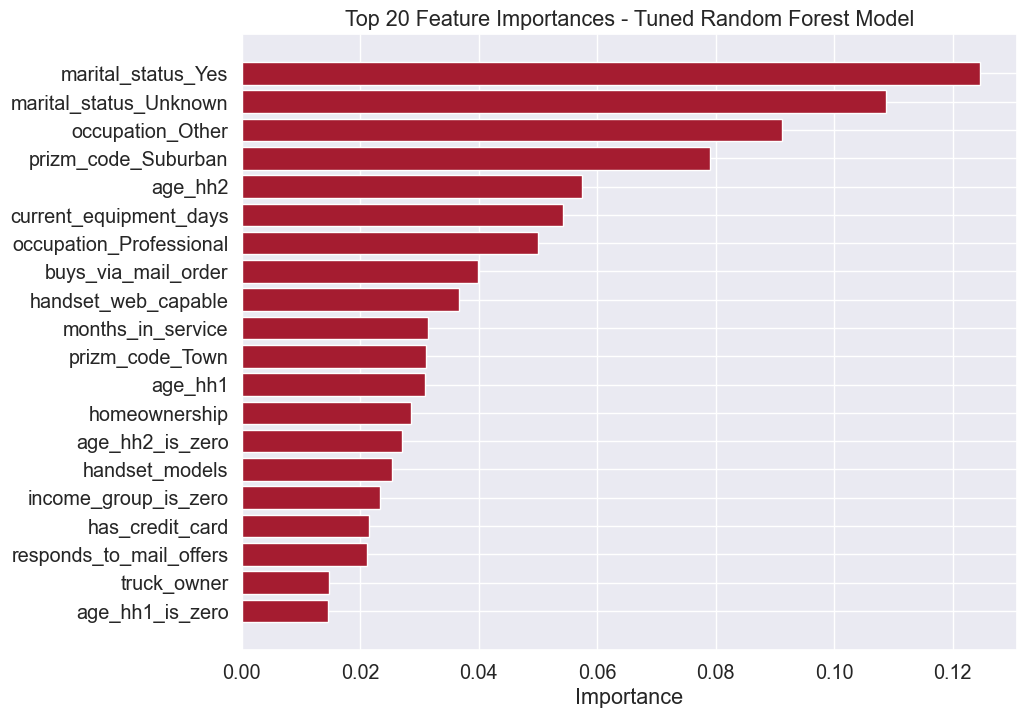

In [198]:
#Feature importance comparison

importances_tuned = RF_tuned1.feature_importances_


feature_imp_tuned = pd.DataFrame({
    'feature': xtrain_postSMOTE_df.columns,
    'importance': importances_tuned
}).sort_values('importance', ascending=False)

fig, ax = plt.subplots(figsize=(10, 8)) 

sorted_tuned = feature_imp_tuned.head(20)  # Top 20 features
ax.barh(sorted_tuned['feature'], sorted_tuned['importance'], color='#A51C30')
ax.set_title('Top 20 Feature Importances - Tuned Random Forest Model')
ax.set_xlabel('Importance')
ax.invert_yaxis()  

### Permutation Importance

In [ ]:
#Permutation importance list

pd.set_option('display.max_rows', None)

# Calculate permutation importance
pi_results = permutation_importance(RF_tuned1, X_test, y_test, n_repeats=50, random_state=109)

# Create a DataFrame to display results
pi_data = {
    'importance_mean': pi_results['importances_mean'],
    'importance_std': pi_results['importances_std'],
    'feature': X_test.columns
}
pi_df = pd.DataFrame(pi_data)

# Sort by importance for plotting
pi_df_sorted = pi_df.sort_values('importance_mean', ascending=False).reset_index(drop=True)
pi_df_sorted.head(20)

importance_mean  importance_std                  feature
0          0.018877        0.002675          age_hh2_is_zero
1          0.013869        0.001794     income_group_is_zero
2          0.009090        0.001623          age_hh1_is_zero
3          0.005048        0.001727       marital_status_Yes
4          0.004954        0.001308                  age_hh1
5          0.004198        0.001798                  age_hh2
6          0.003839        0.001514  occupation_Professional
7          0.002842        0.001721   marital_status_Unknown
8          0.002799        0.002225            homeownership
9          0.001660        0.001259         occupation_Other
10         0.001302        0.001373      prizm_code_Suburban
11         0.000780        0.000902           handset_models
12         0.000772        0.000498                 handsets
13         0.000667        0.000360           received_calls
14         0.000546        0.001268              truck_owner
15         0.000476        0.000825             income_group
16         0.000460        0.000233         prizm_code_Rural
17         0.000401        0.001586          has_credit_card
18         0.000374        0.000407            handset_price
19         0.000249        0.000187         unanswered_calls

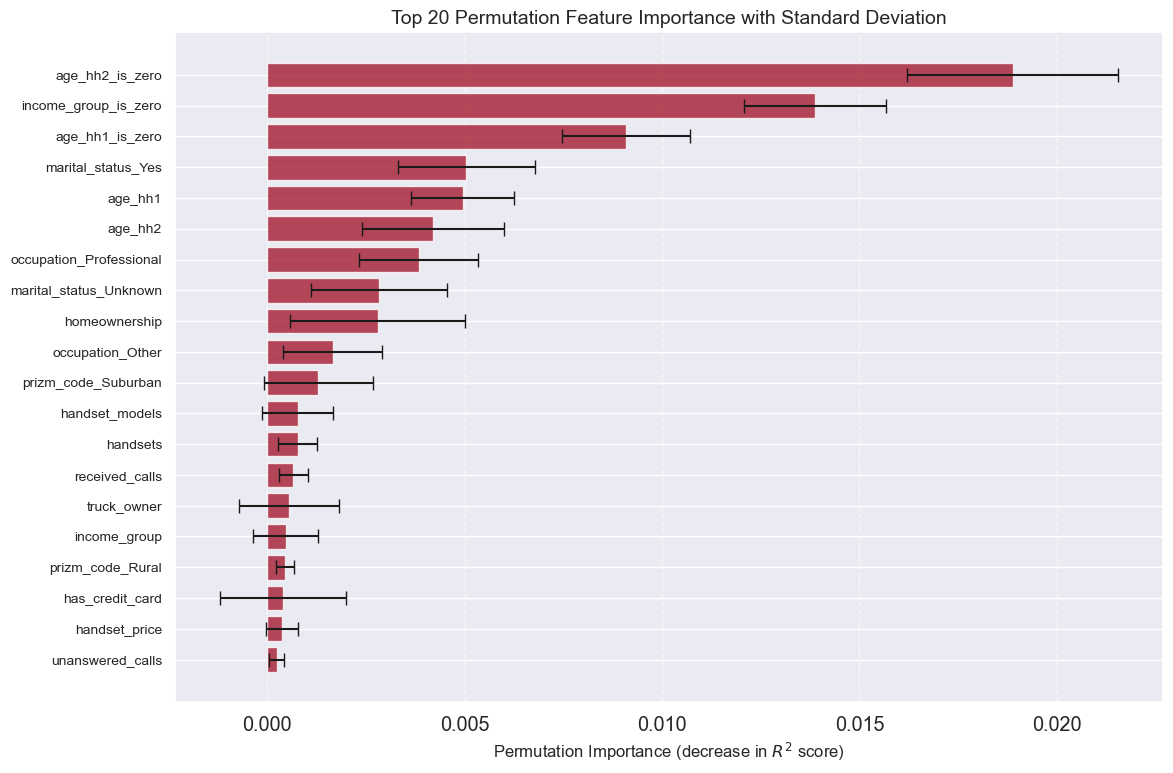

In [201]:
# Limit the chart to the top 20 features for better readability
top_features = pi_df_sorted.head(20).sort_values('importance_mean', ascending=True)


plt.figure(figsize=(12, 8))  
plt.barh(
    range(len(top_features)), 
    top_features['importance_mean'], 
    xerr=top_features['importance_std'],
    capsize=5, alpha=0.8, color='#A51C30' 
)

plt.yticks(range(len(top_features)), top_features['feature'], fontsize=10)  

plt.xlabel('Permutation Importance (decrease in $R^2$ score)', fontsize=12)
plt.title('Top 20 Permutation Feature Importance with Standard Deviation', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()



The comparison between model-based and permutation importance highlights complementary insights into feature contributions. Model-based importance emphasizes categorical features like `marital_status_Yes` and `occupation_Other`, which dominate due to their influence on decision tree splits. In contrast, permutation importance ranks numeric features such as `age_hh2_is_zero` and `income_group_is_zero` higher, as they have a more direct impact on prediction accuracy when shuffled. While model-based importance shows a steep decline in importance after the top features, permutation importance reveals smaller, more distributed contributions with variability (`importance_std`), indicating sensitivity to shuffling. Key features like `age_hh2_is_zero` and `marital_status_Yes` are consistently important in both methods, making them crucial for predictions. Conversely, features with low importance across both methods, such as `unanswered_calls` or `handset_price`, could be considered for removal to simplify the model.

### Causal Inference

In [ ]:
# Let's find the binary feature that has largest discrepancy in churn rate

import numpy as np

def find_sorted_discrepancy_features(X_train, y_train):
    """
    Finds all binomial features in X_train & sort by the largest discrepancy in churn rate (y_train=1 vs y_train=0).
    
    Parameters:
    X_train (pd.DataFrame): Feature dataframe.
    y_train (pd.Series): Target variable (churn indicator).
    
    Returns:
    list of tuples: Each tuple contains a feature name and its churn rate discrepancy, sorted in descending order.
    """
    # Find binary features
    binomial_features = X_train.columns[X_train.nunique() == 2]
    
    discrepancies = []
    
    for feature in binomial_features:
        # Calculate churn rate discrepancy
        churn_rate_0 = y_train[X_train[feature] == 0].mean().values[0]
        churn_rate_1 = y_train[X_train[feature] == 1].mean().values[0]
        
        # if np.isnan(churn_rate_0) or np.isnan(churn_rate_1):
        #     continue
    
        discrepancy = abs(churn_rate_1 - churn_rate_0)
        discrepancies.append((feature, discrepancy))

    sorted_discrepancies = sorted(discrepancies, key=lambda x: x[1], reverse=True)
    
    return sorted_discrepancies

# Let's see which features have large discrepancies
sorted_features = find_sorted_discrepancy_features(X_train, y_train)
print("Features sorted by churn rate discrepancy:")
for feature, discrepancy in sorted_features:
    print(f"Feature: {feature}, Discrepancy: {discrepancy:.4f}")

Features sorted by churn rate discrepancy:
Feature: retention_offers_accepted_is_zero, Discrepancy: 0.1893
Feature: made_call_to_retention_team, Discrepancy: 0.1854
Feature: retention_calls_is_zero, Discrepancy: 0.1854
Feature: handset_web_capable, Discrepancy: 0.1173
Feature: total_peak_off_peak_calls_is_zero, Discrepancy: 0.0821
Feature: unanswered_calls_is_zero, Discrepancy: 0.0718
Feature: total_care_issues_is_zero, Discrepancy: 0.0648
Feature: received_calls_is_zero, Discrepancy: 0.0631
Feature: total_calls_is_zero, Discrepancy: 0.0588
Feature: occupation_Retired, Discrepancy: 0.0567
Feature: handset_refurbished, Discrepancy: 0.0536
Feature: dropped_calls_is_zero, Discrepancy: 0.0494
Feature: value_added_service_usage_is_zero, Discrepancy: 0.0425
Feature: perc_change_revenues_is_zero, Discrepancy: 0.0376
Feature: age_hh1_is_zero, Discrepancy: 0.0356
Feature: marital_status_Unknown, Discrepancy: 0.0345
Feature: income_group_is_zero, Discrepancy: 0.0340
Feature: occupation_Student, 

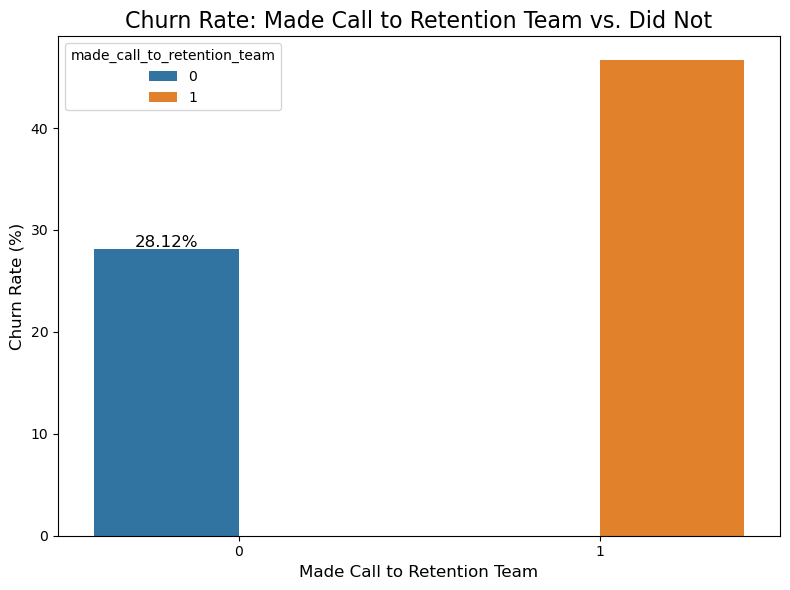

In [ ]:
churn_rate_by_call = pd.concat([X_train['made_call_to_retention_team'], y_train], axis=1)
churn_rate_by_call.columns = ['made_call_to_retention_team', 'churn']  

grouped_data = churn_rate_by_call.groupby('made_call_to_retention_team')['churn'].mean().reset_index()
grouped_data['churn_rate'] = grouped_data['churn'] * 100  

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(
    x='made_call_to_retention_team',
    y='churn_rate',
    data=grouped_data,
    ax=ax,
    hue='made_call_to_retention_team',
    palette=["#1f77b4", "#ff7f0e"]  # Set colors for the bars (blue for no churn, orange for churn)
)

ax.set_title('Churn Rate: Made Call to Retention Team vs. Did Not', fontsize=16)
ax.set_xlabel('Made Call to Retention Team', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)

for p in ax.patches[:-1]:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Question 1: Does making a call to the retention team (made_call_to_retention_team) causally affect the churn rate, or is it merely correlated with it?
**Feature of my choice: made_call_to_retention_team**

Based on the binomial feature exploration, we find that the feature "made_call_to_retention_team" has the highest discrepancy in churn rate. Let's explore if this discrepancy implies casality. It’s important to investigate whether the act of calling the retention team leads to a increase in churn, or if other underlying factors (e.g., customer dissatisfaction, prior retention efforts) are influencing both the likelihood of calling and the likelihood of churn.

The findings from this causal analysis will guide our next steps, helping us decide whether to (1) retrain the retention team or (2) reward them for their performance.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# # Load scaled data
# df_train = pd.read_csv('data/train_clean_scaled.csv')

standard_scaler = StandardScaler()
standard_scaler.fit(X_train.set_index('customer_id'))

X_train_scaled = standard_scaler.transform(X_train.set_index('customer_id'))

# Lasso Like Logistic Regression
logit = LogisticRegressionCV(
    Cs=np.logspace(-4, 4, 10),
    cv=5,
    penalty='l1',
    solver='saga',
    random_state=109,
    max_iter=1000,
    n_jobs=-1,
    scoring=make_scorer(accuracy_score)
)


logit.fit(X_train_scaled, y_train.values.ravel())

y_pred = logit.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred)
print(f"Train Accuracy: {accuracy:.4f}")


Train Accuracy: 0.7179


   made_call_to_retention_team  propensity_scores
0                            0           0.240159
1                            0           0.236848
2                            0           0.247788
3                            0           0.435743
4                            0           0.277643


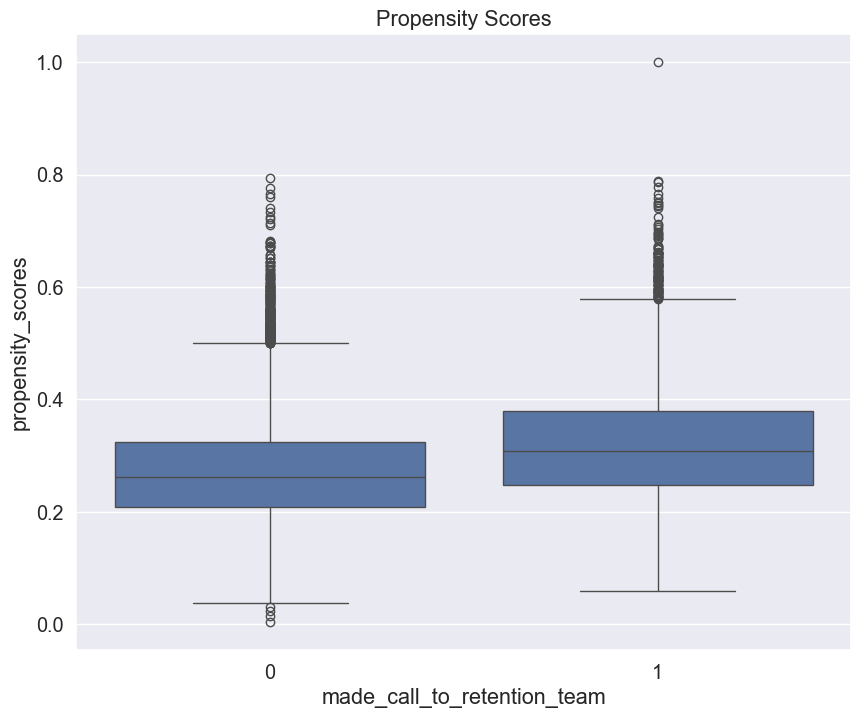

In [ ]:
import seaborn as sns

# Estimate propensity score
propensity_scores = logit.predict_proba(X_train_scaled)[:, 1]
X = X_train.copy()
X['propensity_scores'] = propensity_scores
X['made_call_to_retention_team'] = y_train 

# Visualize the propensity scores
print(pd.DataFrame({'made_call_to_retention_team': X['made_call_to_retention_team'], 'propensity_scores': X['propensity_scores']}).head())
ax = sns.boxplot(y='propensity_scores', x='made_call_to_retention_team', data=X)
ax.set_title("Propensity Scores")
plt.show()

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns[1:])
X_train_scaled_df['id'] = range(0, X_train_scaled_df.shape[0])
X_train_scaled_df['made_call_to_retention_team'] = X_train['made_call_to_retention_team']

In [68]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

# Create a PsmPy object for propensity score matching
psm = PsmPy(X_train_scaled_df, treatment='made_call_to_retention_team', indx='id', exclude=[])

# Apply logistic propensity score matching
psm.logistic_ps(balance=False)

# Perform k-nearest neighbor matching using propensity scores
psm.knn_matched(matcher='propensity_score', replacement=True, caliper=None, drop_unmatched=True)

# To get the means from the matched data:
matched_callers = psm.df_matched[psm.df_matched['made_call_to_retention_team'] == 1]['id'].values
matched_non_callers = psm.df_matched[psm.df_matched['made_call_to_retention_team'] == 0]['id'].values

# Calculate churn rates for both groups
callers_churn = y_train.iloc[matched_callers]  
non_callers_churn = y_train.iloc[matched_non_callers]  

callers_churn_rate = (callers_churn == 1).mean() 
non_callers_churn_rate = (non_callers_churn == 1).mean()  

# Print the results
print("Churn Rate (Callers):", callers_churn_rate)
print("Churn Rate (Non-Callers):", non_callers_churn_rate)
print("Adjusted Difference in Churn Rate:", callers_churn_rate - non_callers_churn_rate)

ModuleNotFoundError: No module named 'psmpy'

In [ ]:
### ARCHIVE - TOOK TOO LONG TO RUN THE MODEL BELOW, SO GAVE UP

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# # Let's explore different types of boosting to find the best hyperparameters

# # models
# models = {
#     'AdaBoost': AdaBoostClassifier(),
#     'GradientBoosting': GradientBoostingClassifier(),
#     'XGBoost': XGBClassifier(eval_metric='logloss')
# }

# # hyperparameters
# param_grids = {
#     'AdaBoost': {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__learning_rate': [0.4, 0.05],
#     },
#     'GradientBoosting': {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__learning_rate': [0.4, 0.05],
#         'classifier__max_depth': [6]
#     },
#     'XGBoost': {
#         'classifier__n_estimators': [50, 100, 200],
#         'classifier__learning_rate': [0.4, 0.05],
#         'classifier__max_depth': [6]
#     }
# }

# # Store results for each model
# results = {}

# # Loop through models and perform GridSearchCV
# for model_name, model in models.items():
#     print(f"Training {model_name} model...")
    
#     # Create pipeline with preprocessor and classifier
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('classifier', model)
#     ])
    
#     # Perform grid search
#     grid = GridSearchCV(pipeline, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
#     grid.fit(X_train_ci, y_train_ci)
    
#     # Get best estimator
#     best_model = grid.best_estimator_
    
#     # Evaluate model
#     train_accuracy = best_model.score(X_test_ci, y_test_ci)
#     cv_accuracy = grid.cv_results_['mean_test_score'].max()
    
#     # Store results
#     results[model_name] = {
#         'best_model': best_model,
#         'best_params': grid.best_params_,
#         'train_accuracy': train_accuracy,
#         'cv_accuracy': cv_accuracy
#     }

# # Print results for each model
# for model_name, result in results.items():
#     print(f"Results for {model_name}:")
#     print(f"  Best hyperparameters: {result['best_params']}")
#     print(f"  Train Accuracy: {result['train_accuracy']:.4f}")
#     print(f"  CV Accuracy: {result['cv_accuracy']:.4f}\n")
